## Data Analysis for Round 3

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sys
sys.path.append('./../')  # Add the parent directory to Python path
from plot_utils_CY import *

## Outline for Overall
1. Data Loading: Load your trading data into a Pandas DataFrame. This could be in the form of a CSV file, a database query result, or any other structured data format.
1. Data Cleaning: Clean the data by handling missing values, removing duplicates, and converting data types if necessary.
1. Data Manipulation: Perform data manipulation tasks such as calculating returns, creating new features, or aggregating data.
1. Data Analysis: Analyze the trading data using statistical methods and visualizations. See below `Outline for Data Analysis` for specifics.
1. Performance Metrics: Calculate performance metrics such as Sharpe Ratio, Maximum Drawdown, and Win Rate.
1. Visualization: Visualize performance metrics and other relevant information using Matplotlib or other plotting libraries.

### Data Loading
* Loading price data and trade data into dataframes
* Merging data of the same format from different days

In [3]:
path = '../../shared_data/round3/'
days = [0, 1, 2]

prices = [pd.read_csv(path + f'prices_round_3_day_{d}.csv', sep=';') for d in days]
price = pd.concat(prices)
price

day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0        0          0     CHOCOLATE         7999           111          NaN   
1        0          0  STRAWBERRIES         3999           210          NaN   
2        0          0         ROSES        14999            72          NaN   
3        0          0   GIFT_BASKET        71348            19      71347.0   
4        0        100   GIFT_BASKET        71344             1      71343.0   
...    ...        ...           ...          ...           ...          ...   
39995    2     999800   GIFT_BASKET        69537             2      69536.0   
39996    2     999900     CHOCOLATE         7749           143          NaN   
39997    2     999900   GIFT_BASKET        69551             1      69550.0   
39998    2     999900  STRAWBERRIES         3984           240          NaN   
39999    2     999900         ROSES        14411            59          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0               NaN          NaN           NaN         8001           111   
1               NaN          NaN           NaN         4001           210   
2               NaN          NaN           NaN        15001            72   
3              24.0          NaN           NaN        71362            19   
4              12.0      71342.0          20.0        71355             1   
...             ...          ...           ...          ...           ...   
39995          18.0      69535.0          24.0        69547             2   
39996           NaN          NaN           NaN         7751           143   
39997          19.0      69549.0          20.0        69561             1   
39998           NaN          NaN           NaN         3985            92   
39999           NaN          NaN           NaN        14412            59   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0              NaN           NaN          NaN           NaN     8000.0   
1              NaN           NaN          NaN           NaN     4000.0   
2              NaN           NaN          NaN           NaN    15000.0   
3          71363.0          24.0          NaN           NaN    71355.0   
4          71356.0          12.0      71357.0          20.0    71349.5   
...            ...           ...          ...           ...        ...   
39995      69548.0          18.0      69550.0          24.0    69542.0   
39996          NaN           NaN          NaN           NaN     7750.0   
39997      69562.0          19.0      69564.0          20.0    69556.0   
39998       3986.0         148.0          NaN           NaN     3984.5   
39999          NaN           NaN          NaN           NaN    14411.5   

       profit_and_loss  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
39995              0.0  
39996              0.0  
39997              0.0  
39998              0.0  
39999              0.0  

[120000 rows x 17 columns]

In [4]:
trades = [pd.read_csv(path + f'trades_round_3_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trades)
trade

timestamp  buyer  seller        symbol   currency    price  quantity  \
0             0    NaN     NaN     CHOCOLATE  SEASHELLS   8001.0         8   
1             0    NaN     NaN         ROSES  SEASHELLS  15001.0         3   
2           200    NaN     NaN         ROSES  SEASHELLS  15000.0         3   
3           500    NaN     NaN  STRAWBERRIES  SEASHELLS   3999.0        10   
4          1000    NaN     NaN   GIFT_BASKET  SEASHELLS  71360.0         2   
...         ...    ...     ...           ...        ...      ...       ...   
3787     997900    NaN     NaN   GIFT_BASKET  SEASHELLS  69478.0         5   
3788     998400    NaN     NaN  STRAWBERRIES  SEASHELLS   3985.0         4   
3789     998800    NaN     NaN     CHOCOLATE  SEASHELLS   7752.0         7   
3790     998900    NaN     NaN   GIFT_BASKET  SEASHELLS  69550.0         5   
3791     998900    NaN     NaN         ROSES  SEASHELLS  14404.0         5   

      day  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
3787    2  
3788    2  
3789    2  
3790    2  
3791    2  

[11348 rows x 8 columns]

### Data Cleaning
* Counting the number of missing values in the data, per column

In [5]:
price.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        65244
bid_volume_2       65244
bid_price_3        99723
bid_volume_3       99723
ask_price_1            0
ask_volume_1           0
ask_price_2        65236
ask_volume_2       65236
ask_price_3        99720
ask_volume_3       99720
mid_price              0
profit_and_loss        0
dtype: int64

In [6]:
trade.isna().sum()

timestamp        0
buyer        11348
seller       11348
symbol           0
currency         0
price            0
quantity         0
day              0
dtype: int64

## Outline for Data Analysis
1. Descriptive Statistics: see below 
1. Visualization: see below `Outline for Data Visualization` for details
1. Correlation Analysis: see below `Outline for Correlation Analysis` for details
1. Volatility Analysis: see below `Outline for Volatility Analysis` for details
1. Autocorrelation Analysis: see below `Outline for Autocorrelation Analysis` for details
1. Stationarity Analysis: see below `Outline for Stationarity Analysis` for details
1. Seasonality Analysis: see below `Outline for Seasonality Analysis` for details
1. Modeling: see below `Outline for Data Modeling` for details
1. Outlier Detection: see below `Outline for Outlier Detection` for details

### Outline for Data Visualization 
For each day and each product, make -
1. An overlayed time series plot of bid, ask, mid prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

1. A plot of only traded prices
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A plot of overlayed individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

1. A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


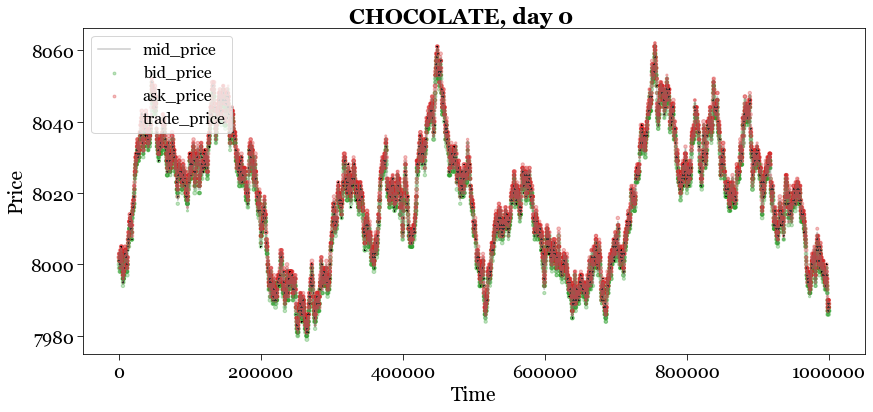

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


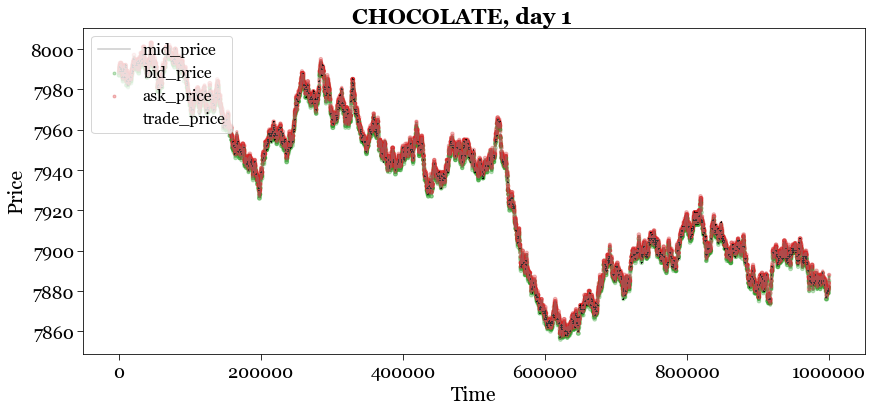

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


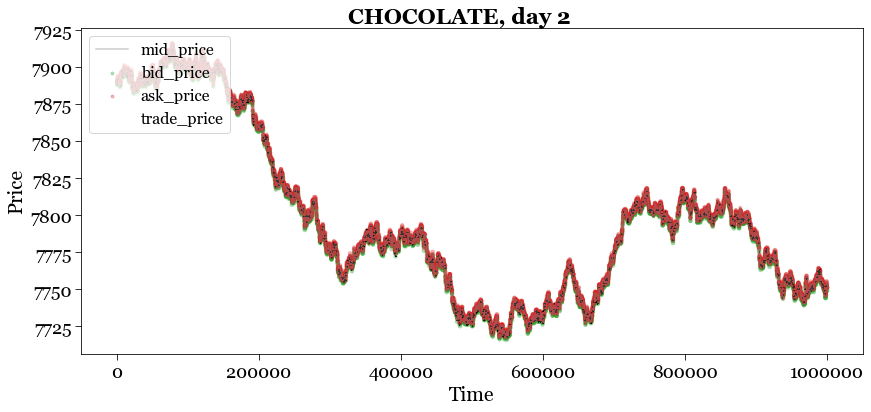

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


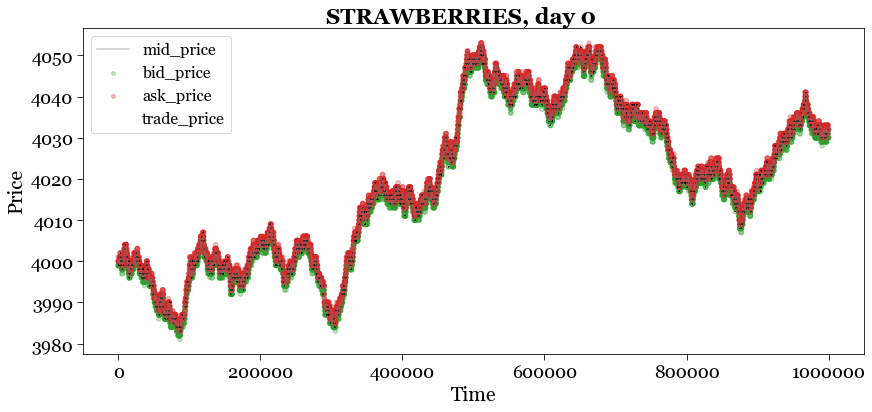

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


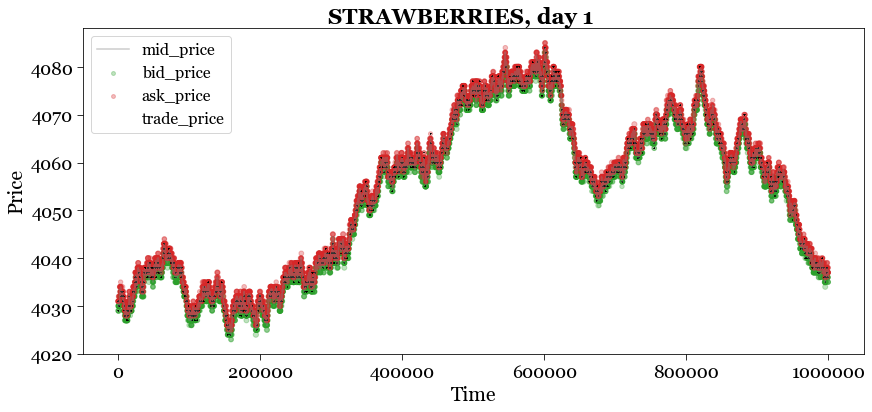

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


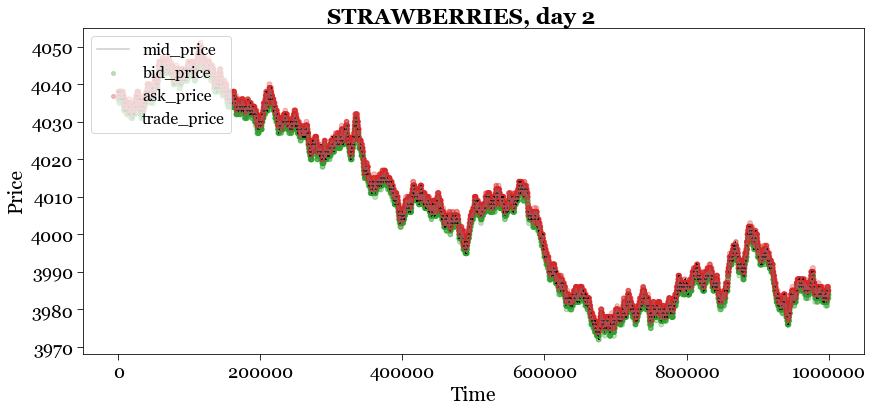

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


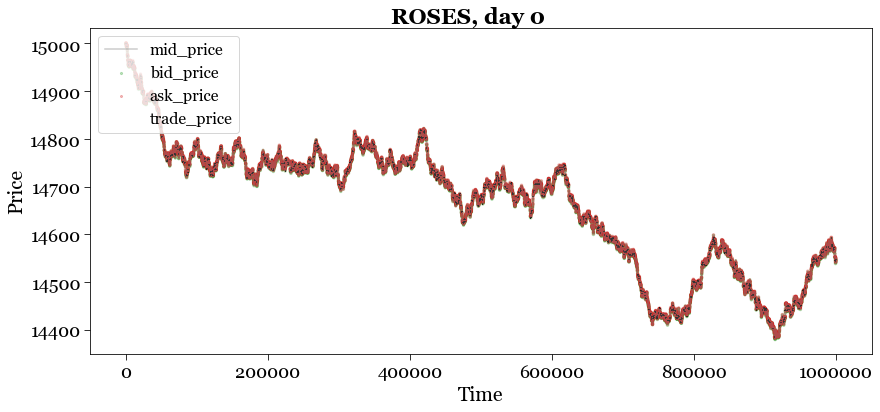

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


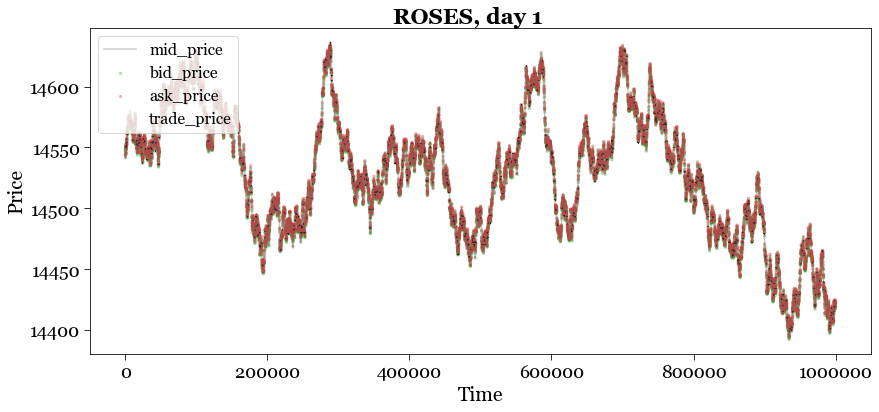

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


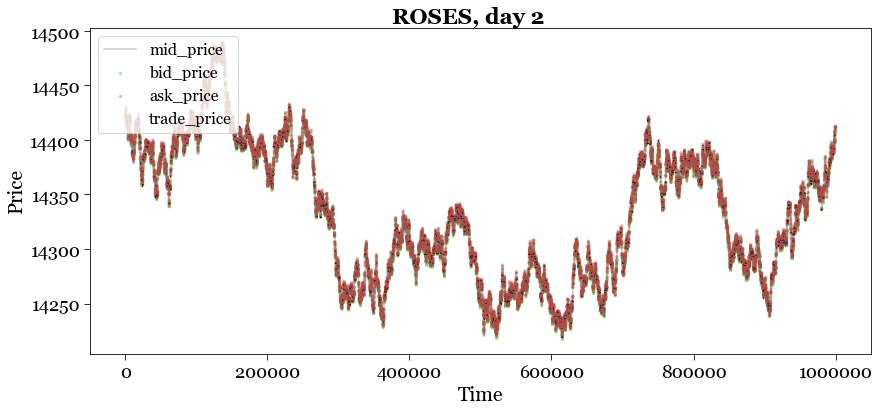

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


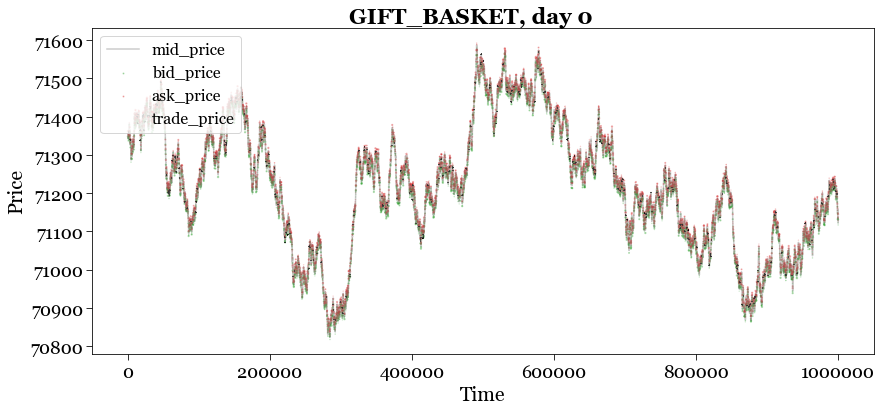

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


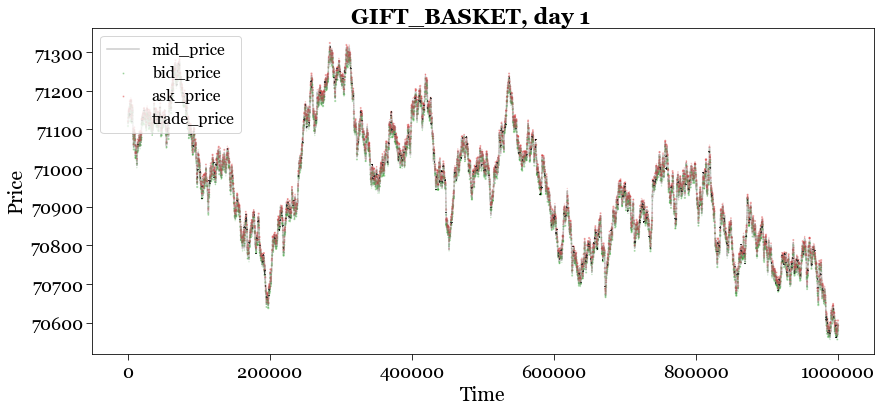

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3060070147.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


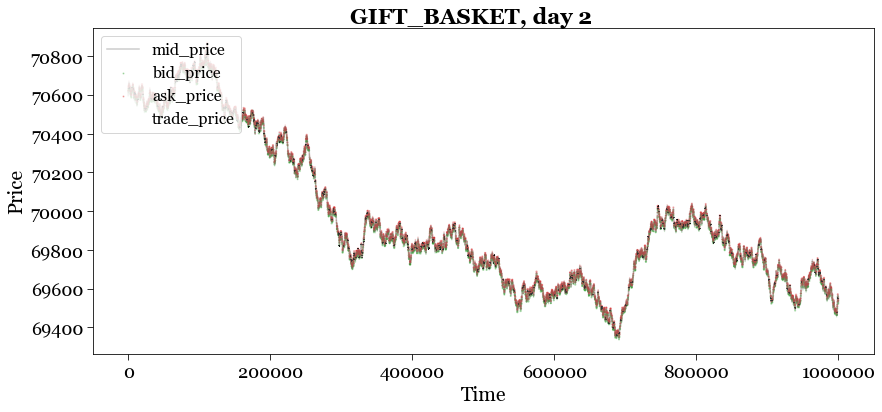

In [7]:
# Overlayed time series plot of prices
products = price['product'].unique()

for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']
        bids = filtered_price['bid_price_1']
        asks = filtered_price['ask_price_1']
        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.scatter(xs, bids, label='bid_price', alpha=0.3,
                   color=tableau_colors[2], marker='o', s=0.1*filtered_price['bid_volume_1'])
        ax.scatter(xs, asks, label='ask_price', alpha=0.3,
                   color=tableau_colors[3], marker='o', s=0.1*filtered_price['ask_volume_1'])
        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='trade_price', alpha=1,
                   color='black', marker='+', s=0.1*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_prices.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_prices.pdf')
        plt.show()

A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


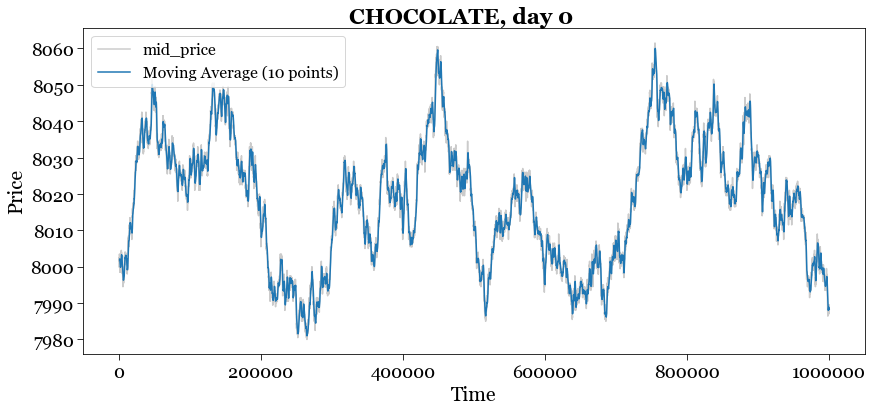

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


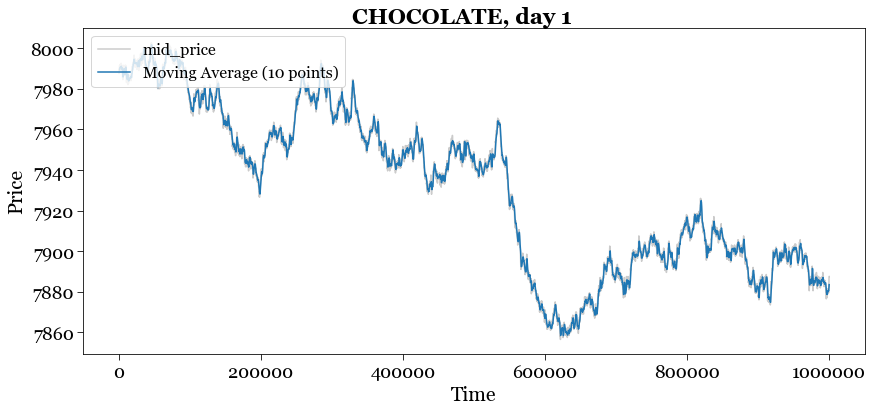

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


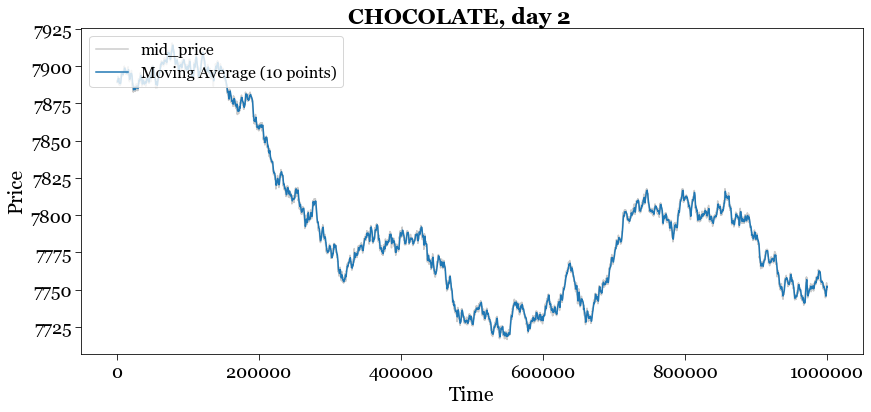

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


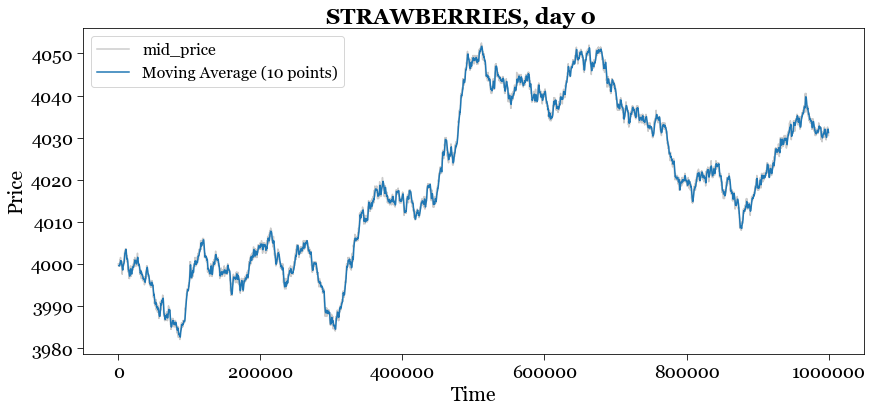

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


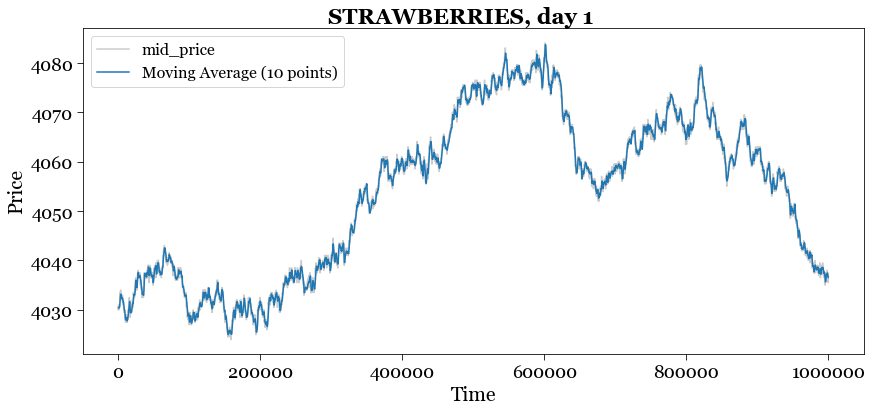

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


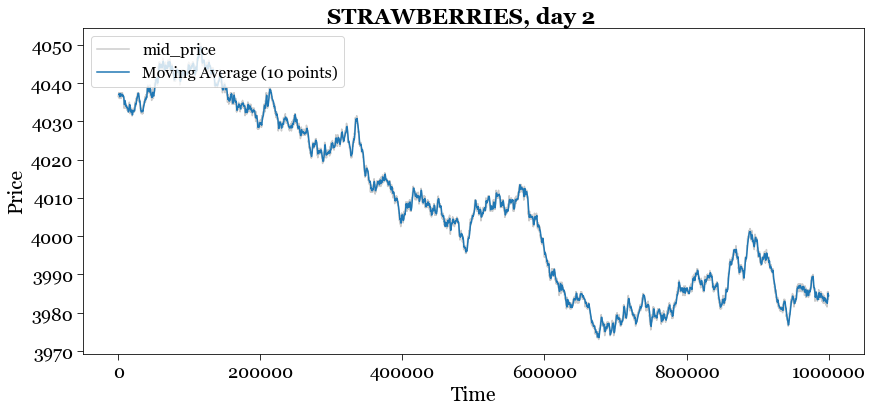

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


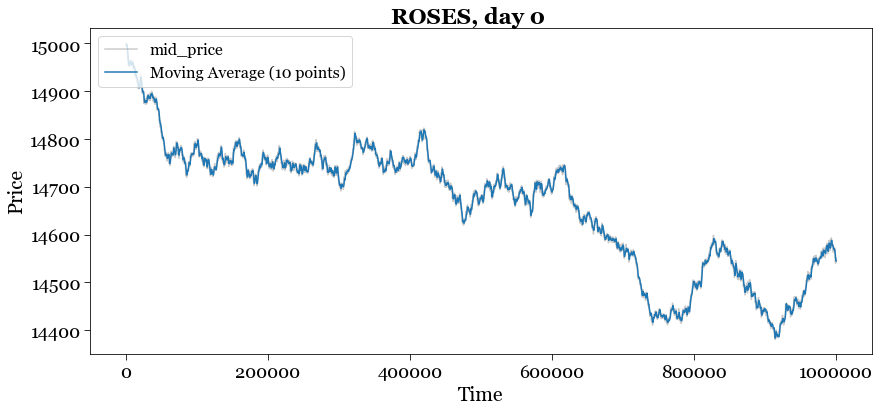

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


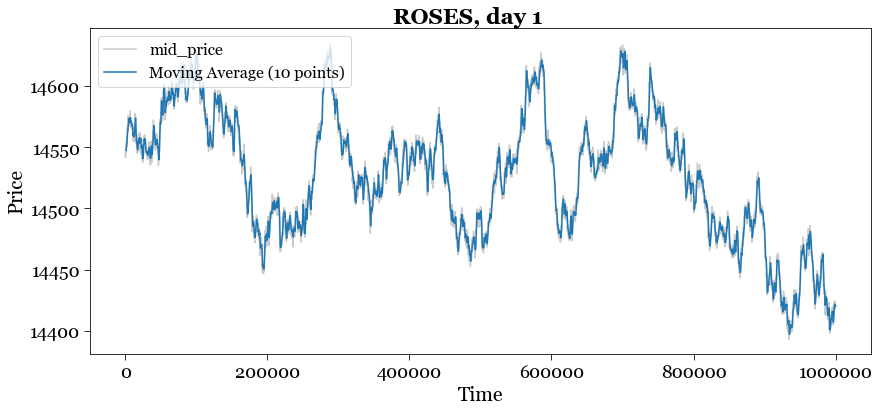

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


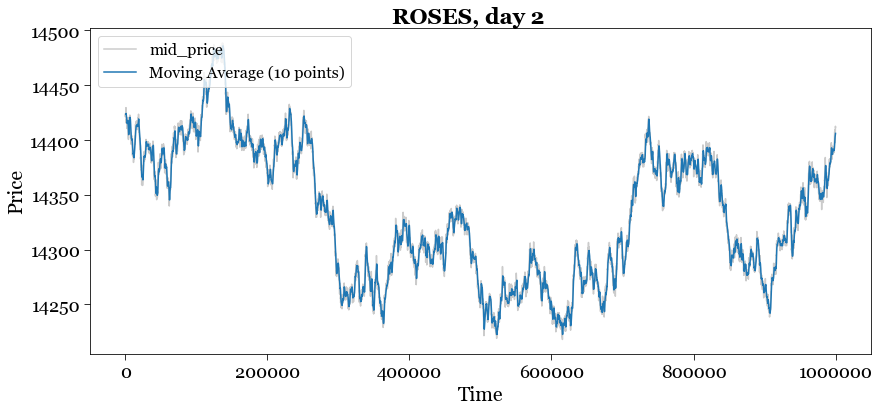

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


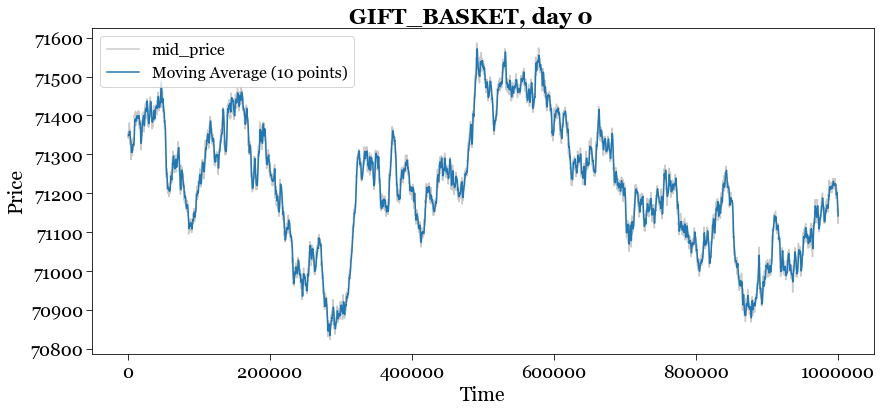

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


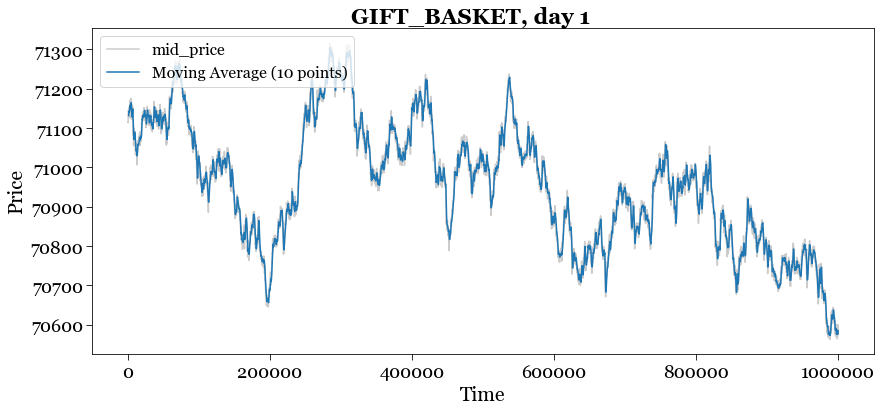

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3681678177.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


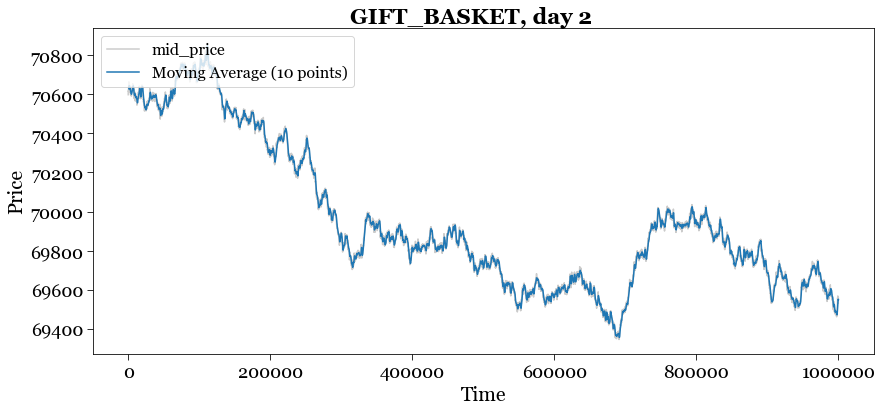

In [8]:
for product in products:
    for day in days:
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']

        # Calculate the moving average
        window_size = 10
        mas = mids.rolling(window=window_size).mean()

        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.plot(xs, mas, label=f'Moving Average ({window_size} points)',
                color=tableau_colors[0], alpha=1) 
                
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_moving_avg.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_moving_avg.pdf')
        plt.show()

A time series plot of trade that happpened with empty strategy
   * scatter of `price` sized by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


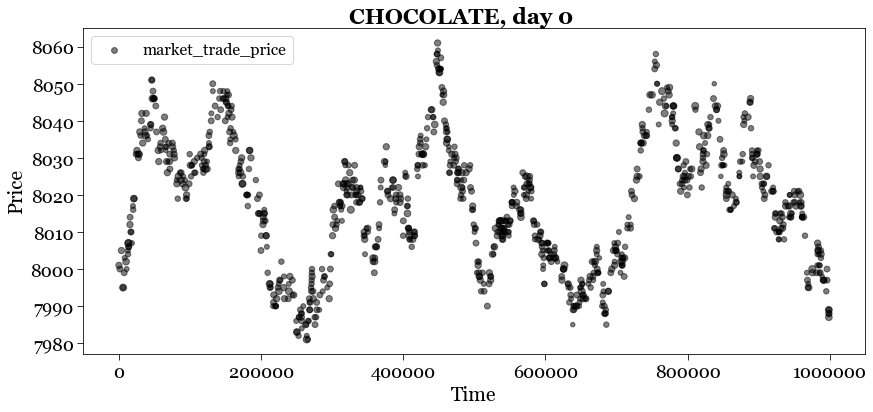

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


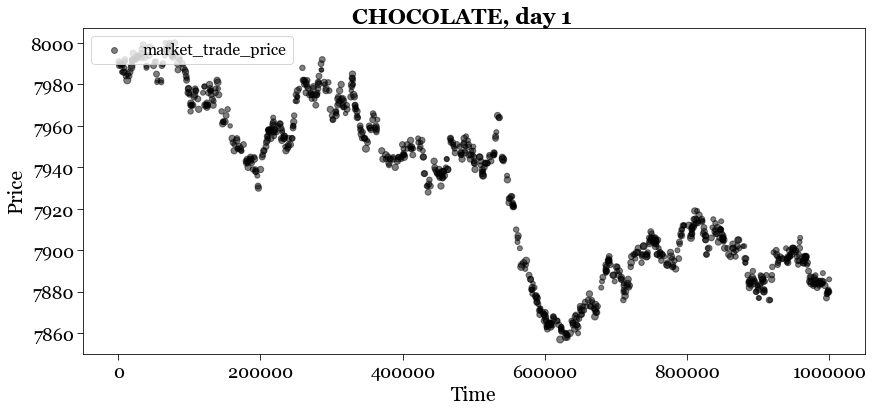

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


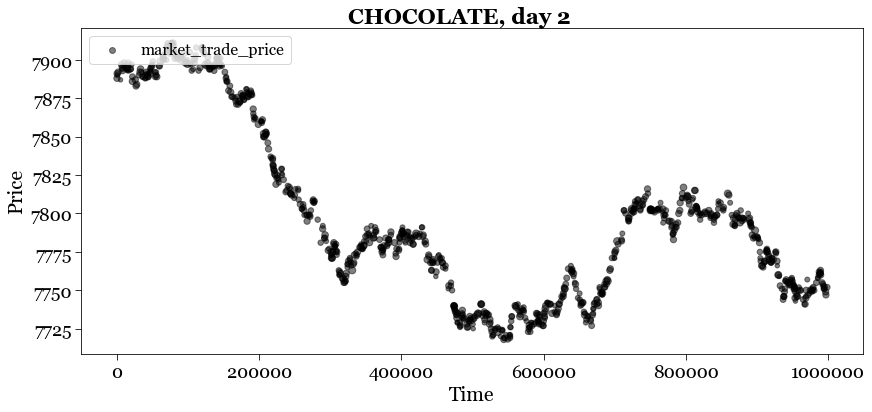

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


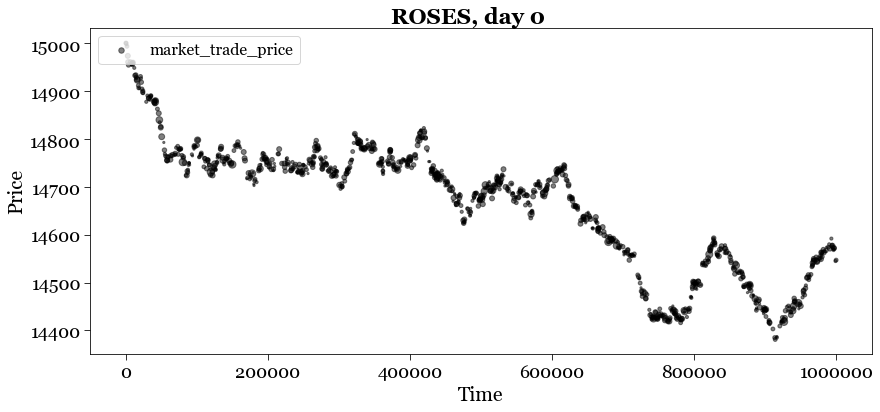

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


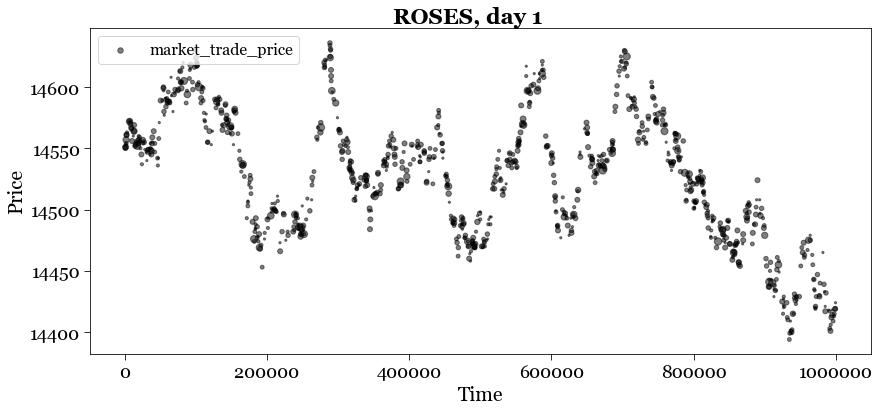

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


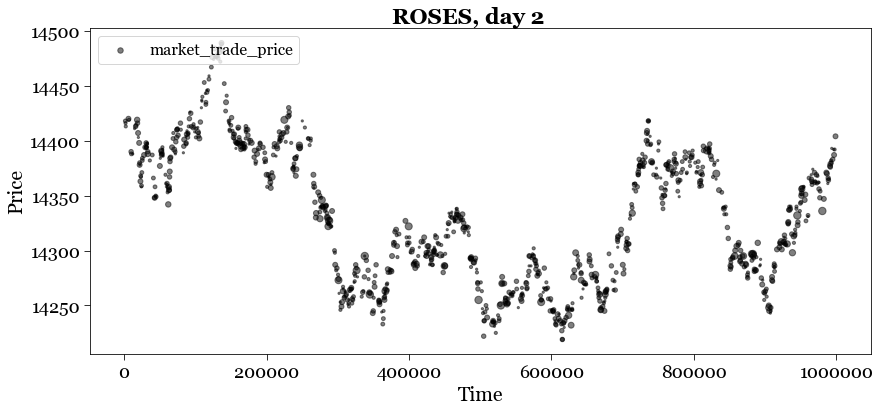

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


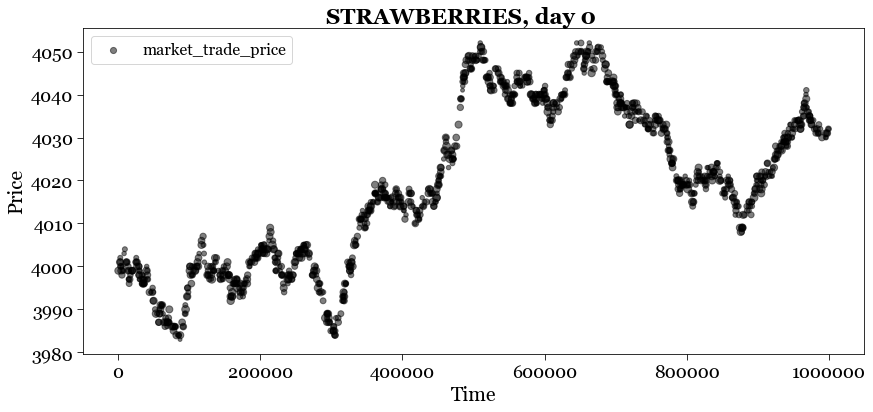

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


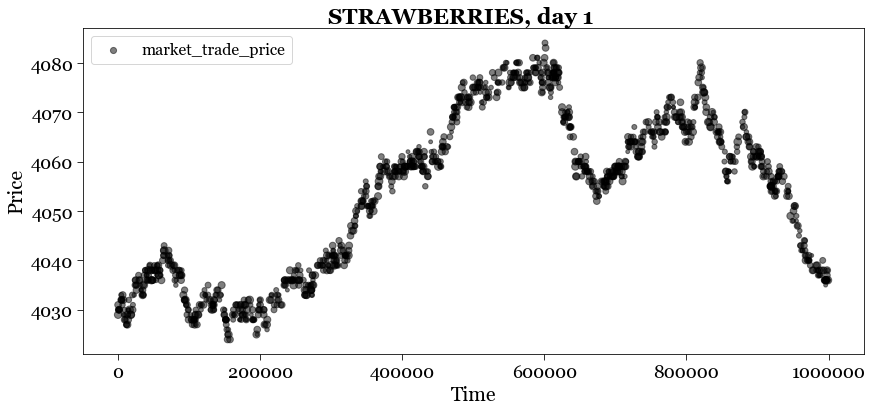

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


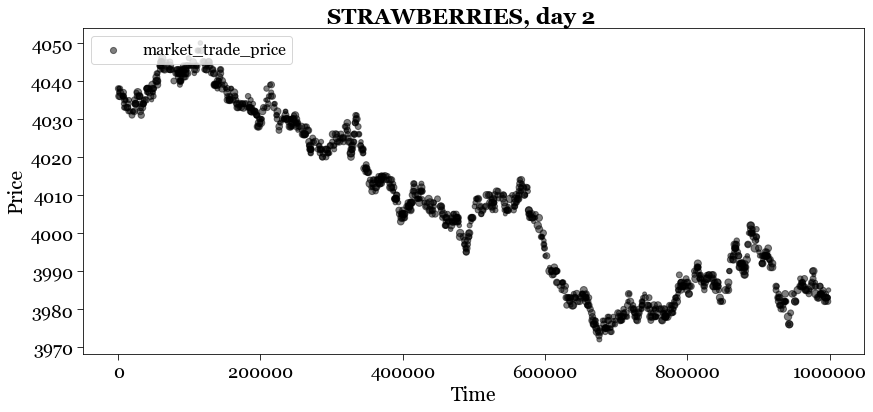

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


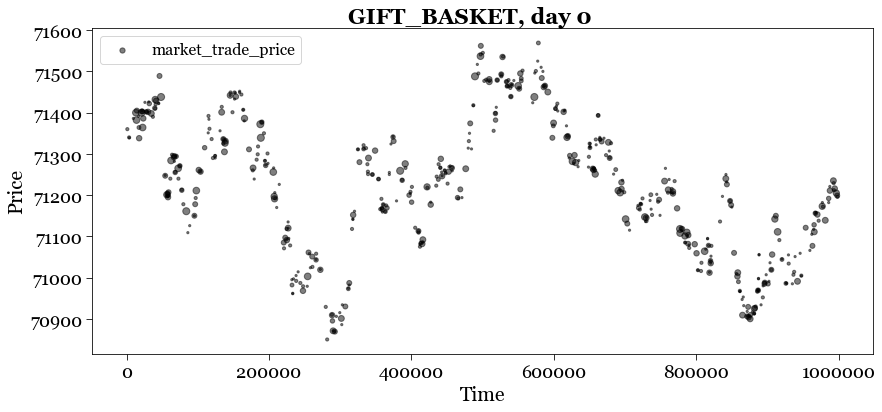

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


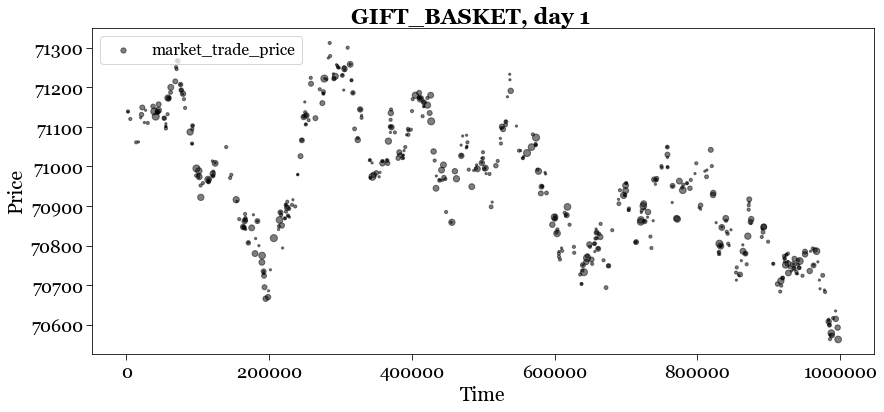

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/2256010872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


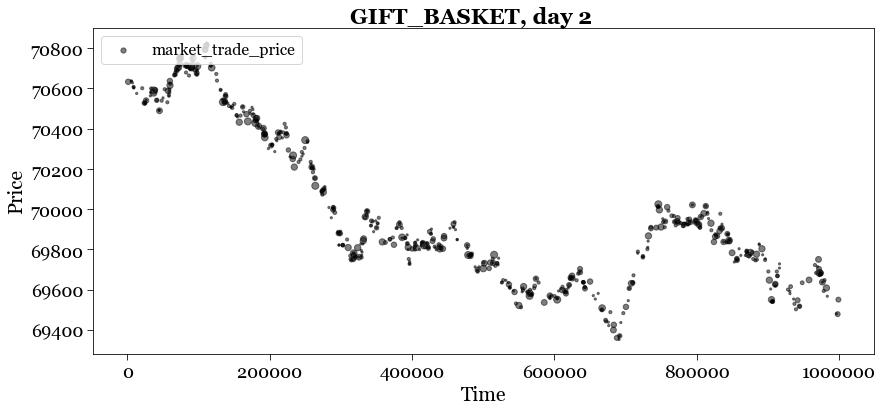

In [9]:
products = trade['symbol'].unique()

for product in products:
    for day in days:
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]

        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='market_trade_price', alpha=0.5,
                   color='black', marker='o', s=5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_market_trade_price.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_market_trade_price.pdf')
        plt.show()

A histogram of trade price
   * histogram of `price`, scaled by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


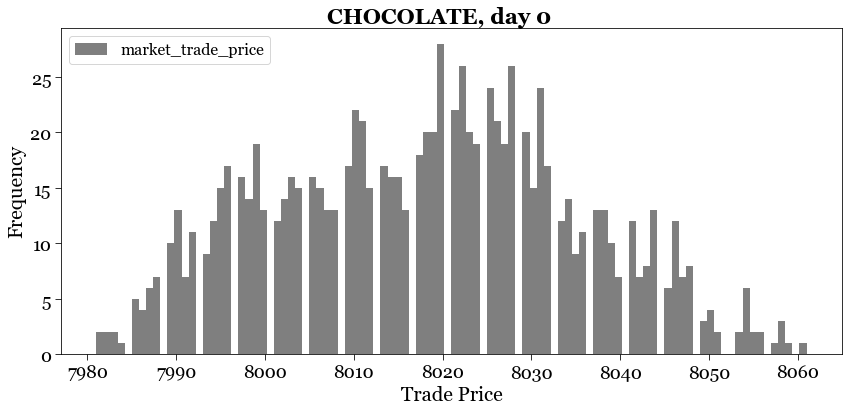

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


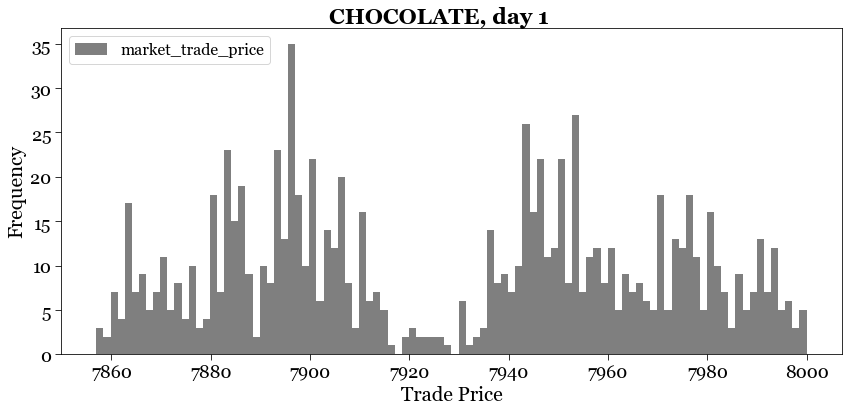

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


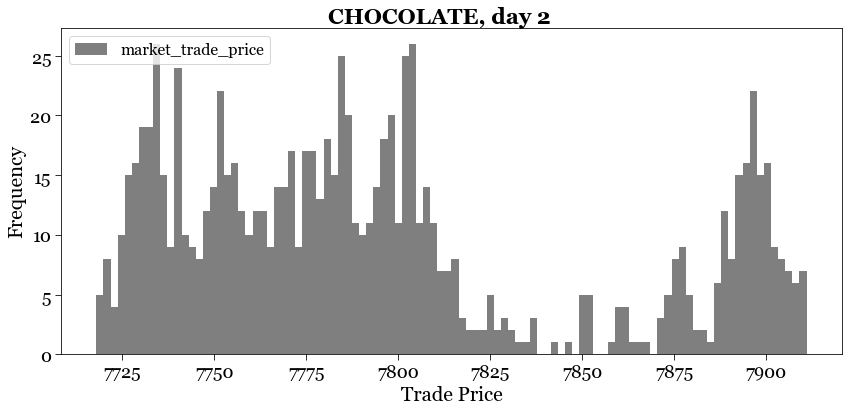

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


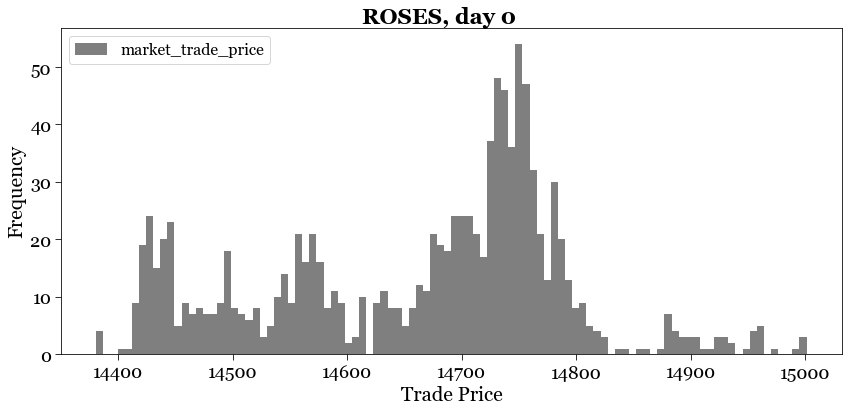

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


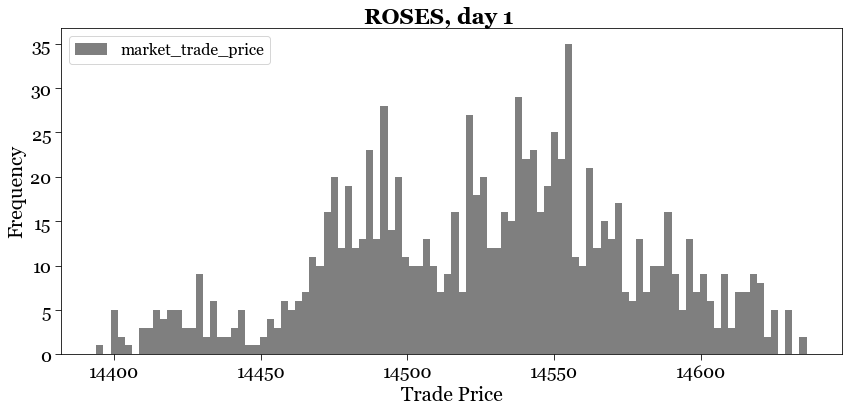

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


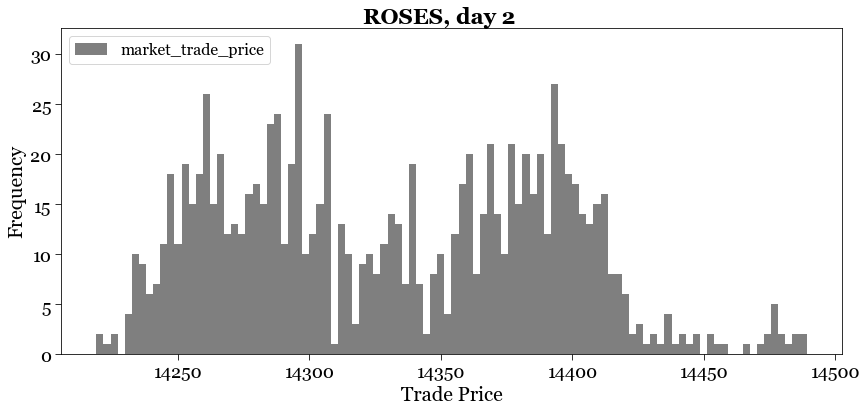

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


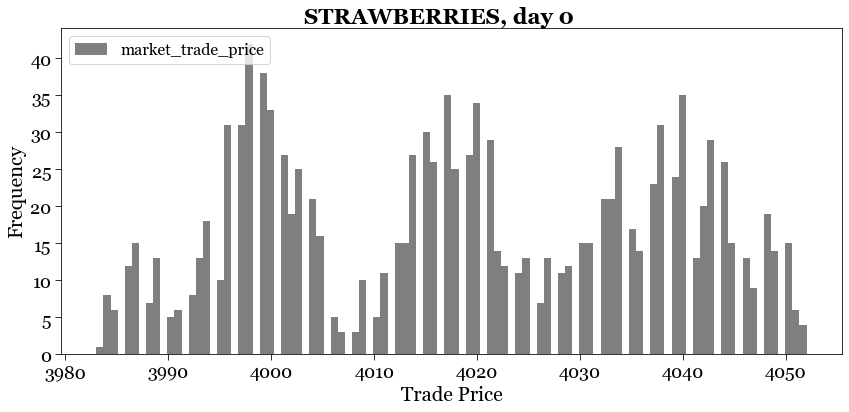

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


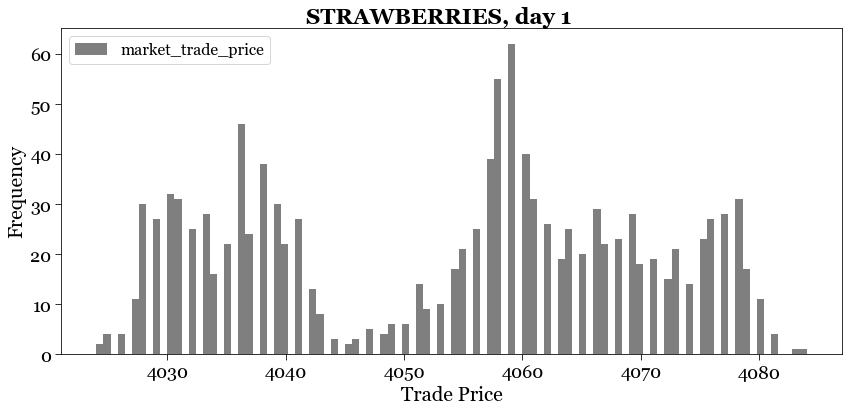

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


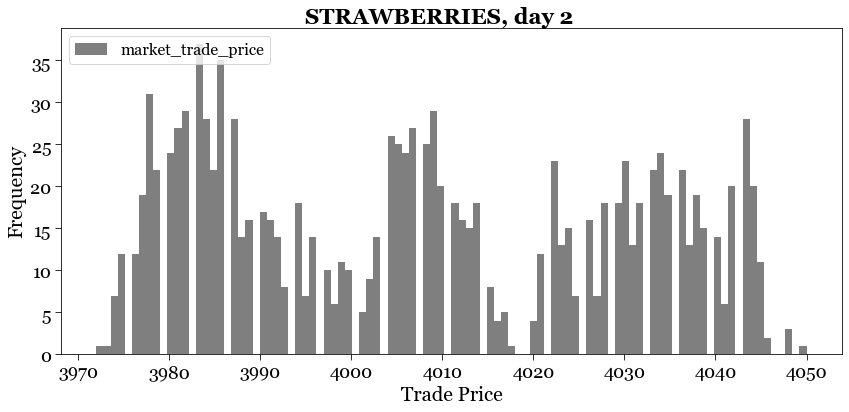

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


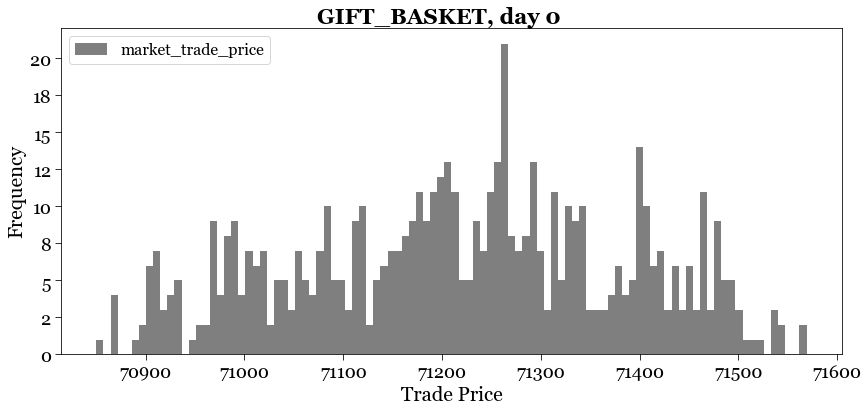

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


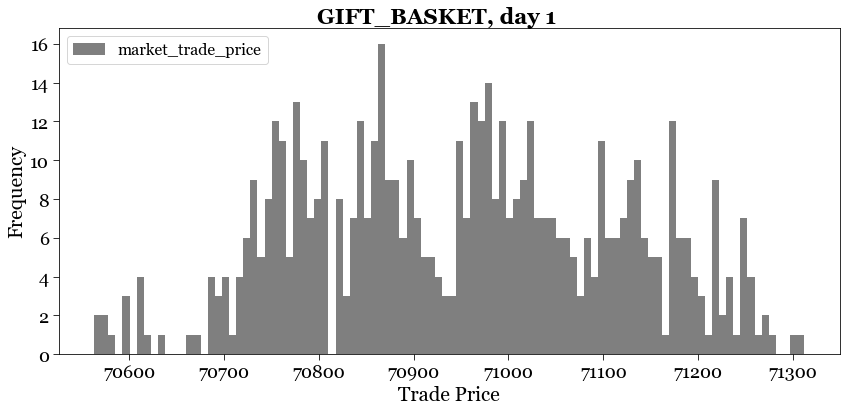

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1192194987.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


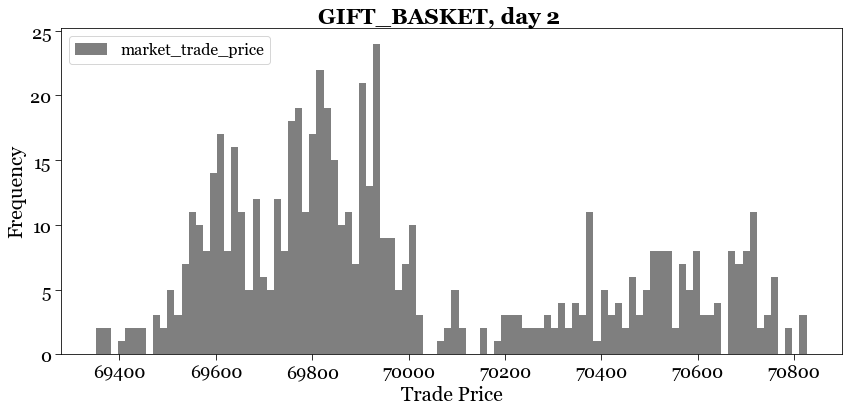

In [10]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_trade['price'], bins=100, alpha=0.5, 
                color='black', label='market_trade_price')

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_trade_histogram.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_trade_histogram.pdf')
        plt.show()

Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


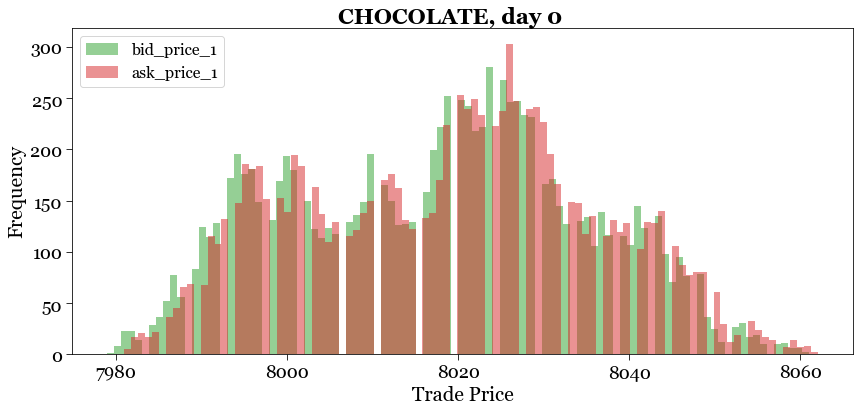

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


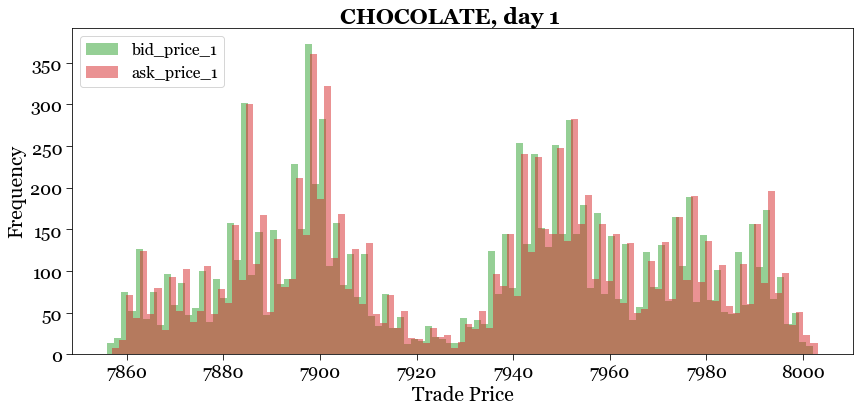

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


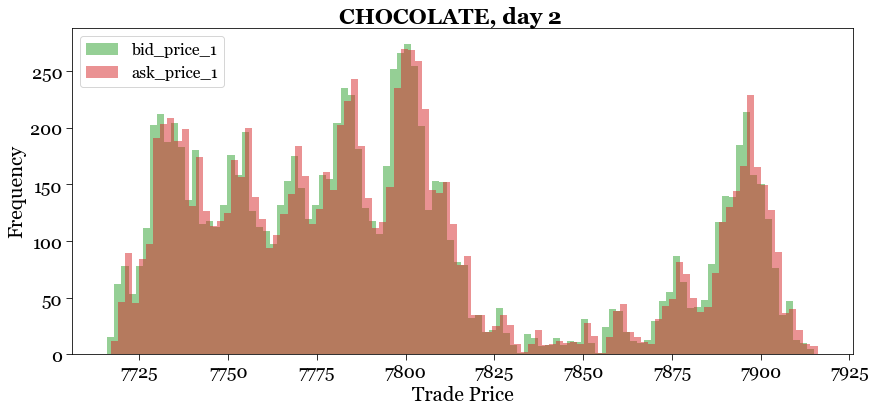

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


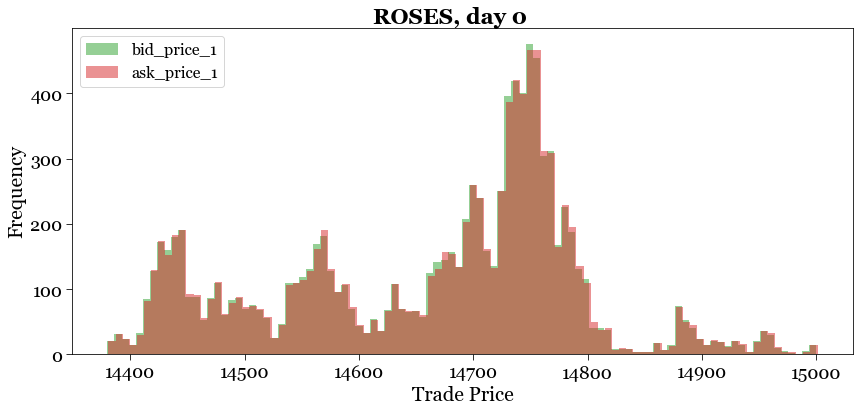

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


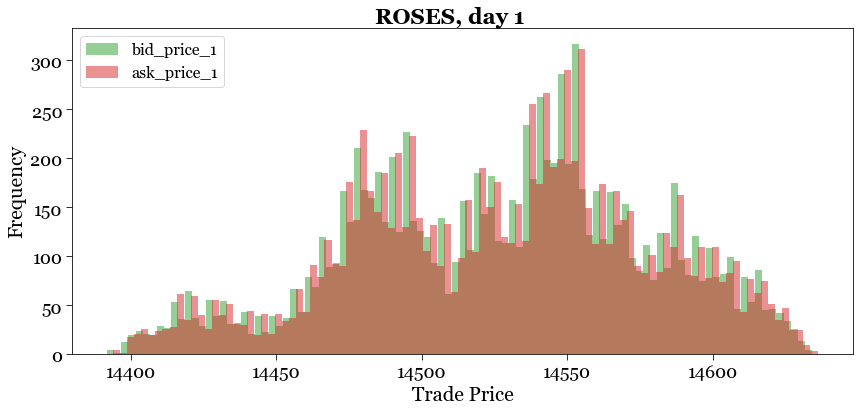

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


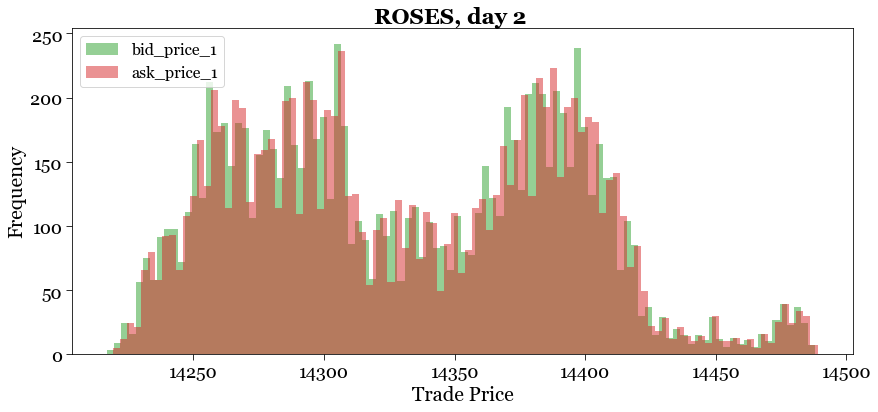

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


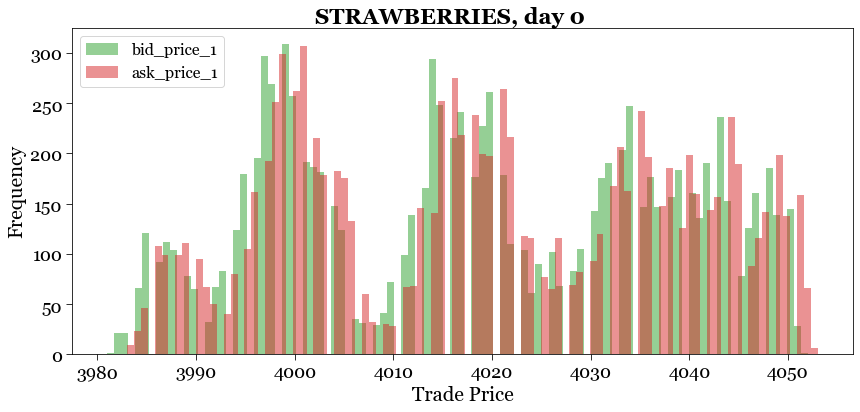

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


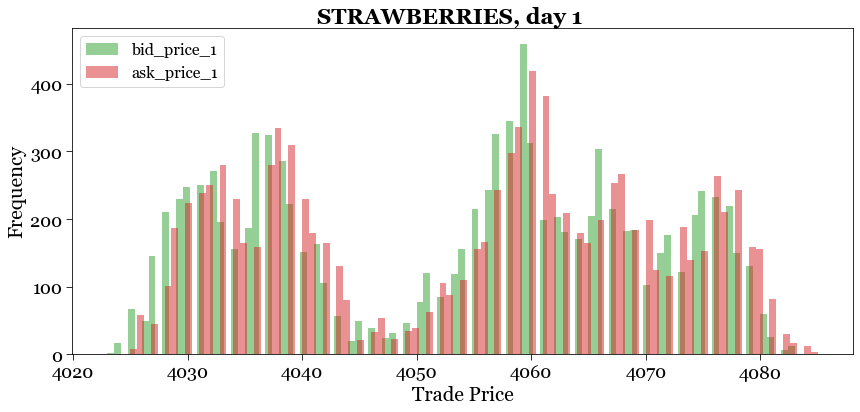

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


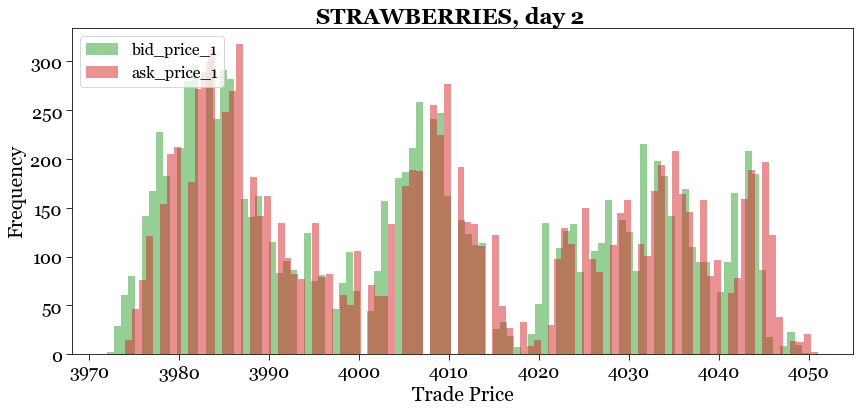

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


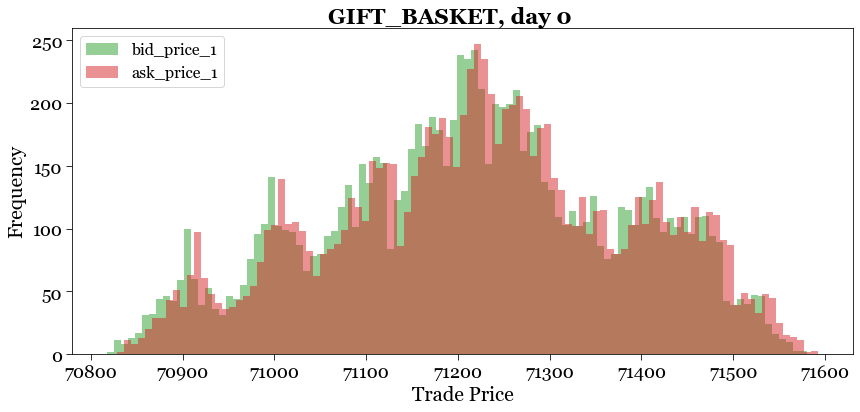

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


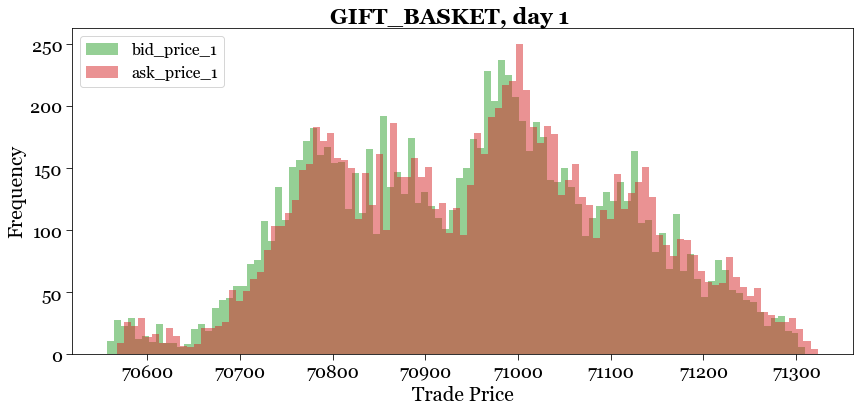

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3128045542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


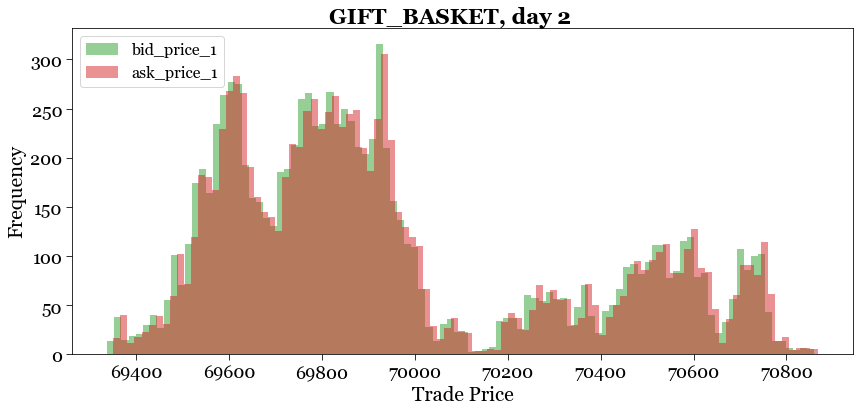

In [11]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['bid_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[2], label='bid_price_1')
        ax.hist(filtered_price['ask_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[3], label='ask_price_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_histogram.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_histogram.pdf')
        plt.show()

A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


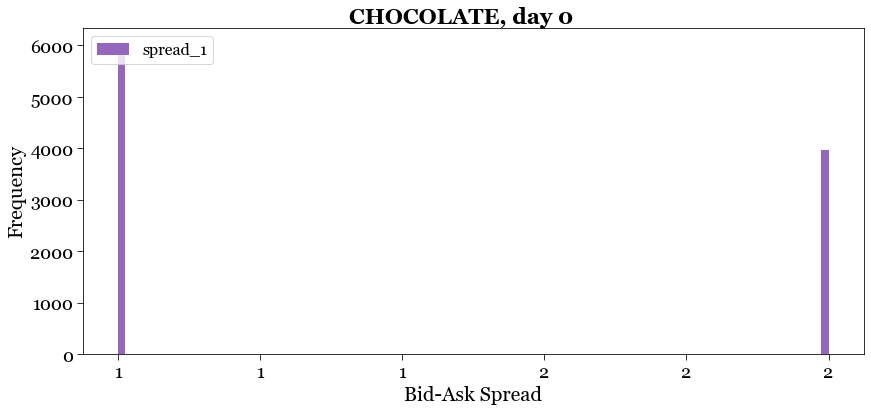

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


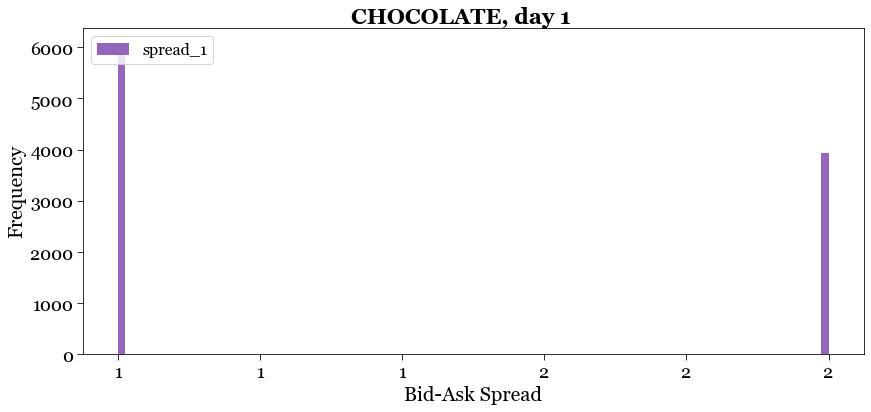

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


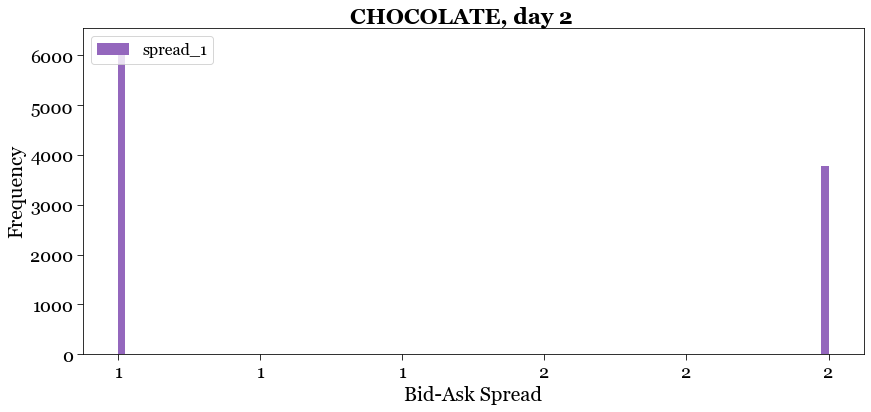

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


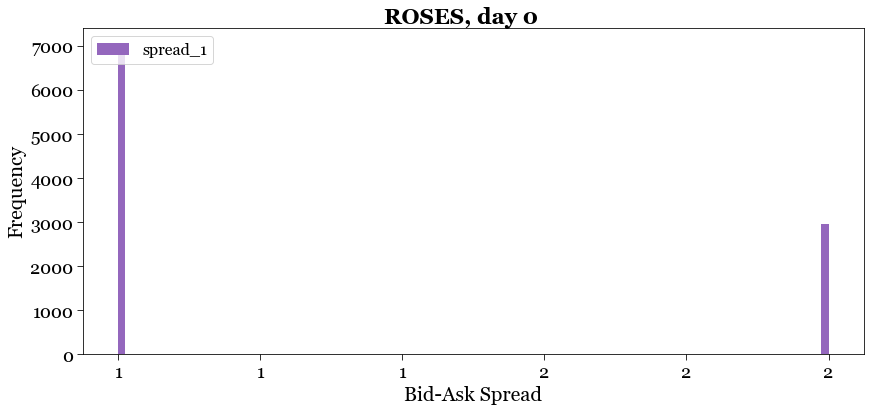

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


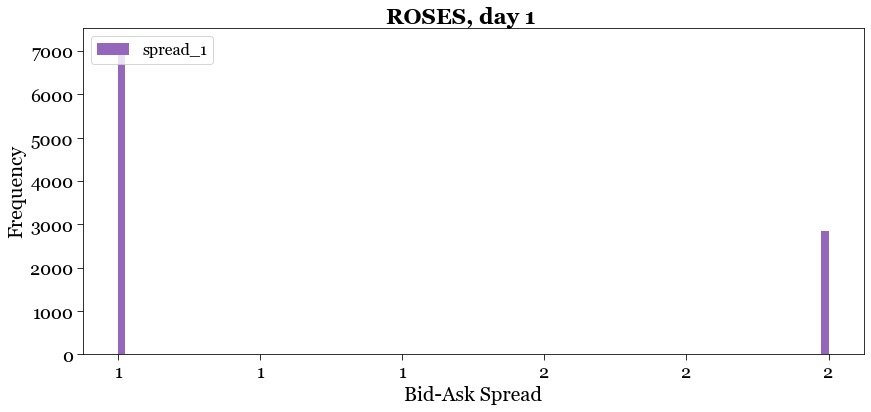

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


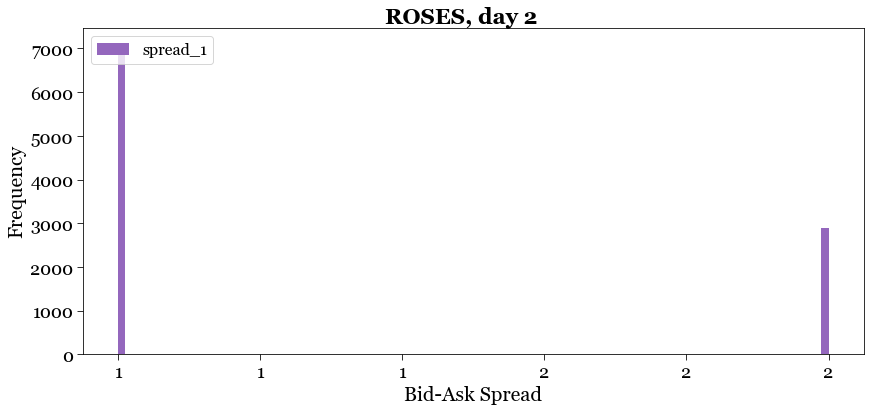

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


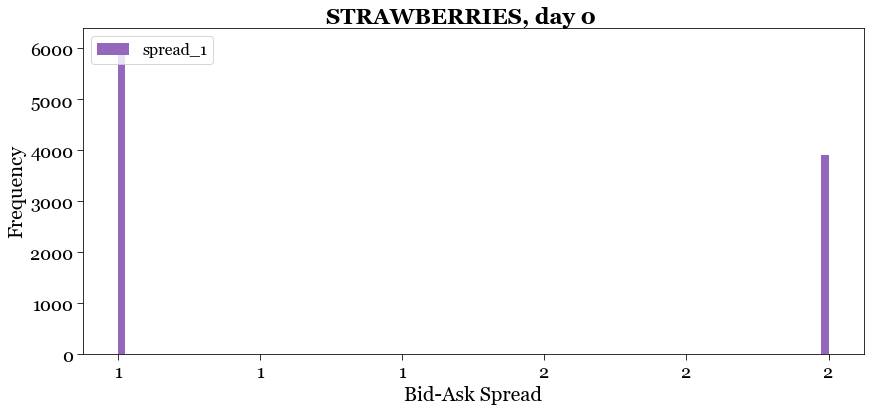

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


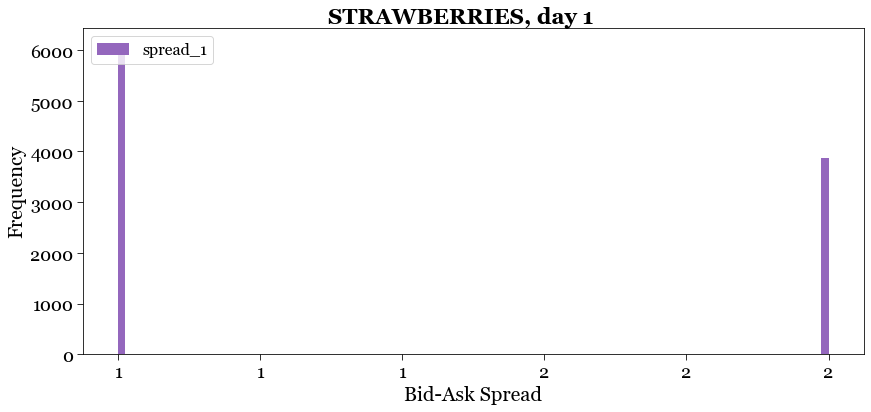

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


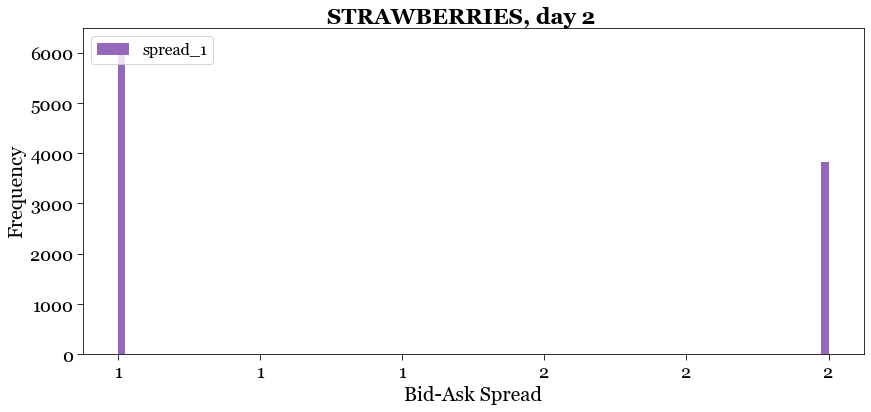

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


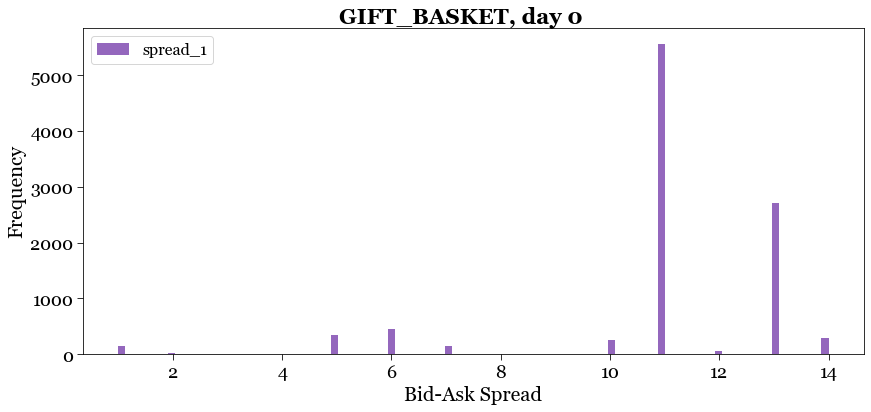

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


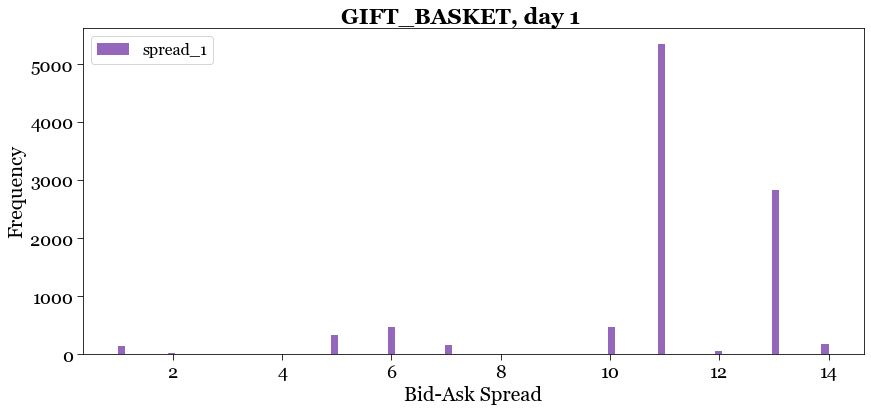

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3644231964.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


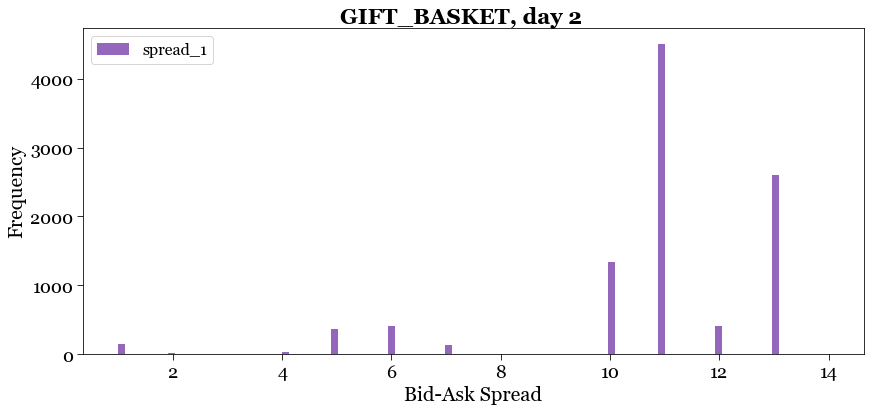

In [12]:
price['spread_1'] = price['ask_price_1'] - price['bid_price_1']

for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['spread_1'], bins=100, alpha=1, 
                color=tableau_colors[4], label='spread_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Bid-Ask Spread', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_spread_histogram.png')
        # plt.savefig(f'./../plots/R3_{product}_day{day}_bid_ask_spread_histogram.pdf')
        plt.show()

### Outline for Correlation Analysis
For each day - 
- Calculate correlation coefficients between different products to understand their relationships.
- Engineer new products if needed, such as the differentials of two existing products.
- Visualize correlations using heatmaps or scatter plots.

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


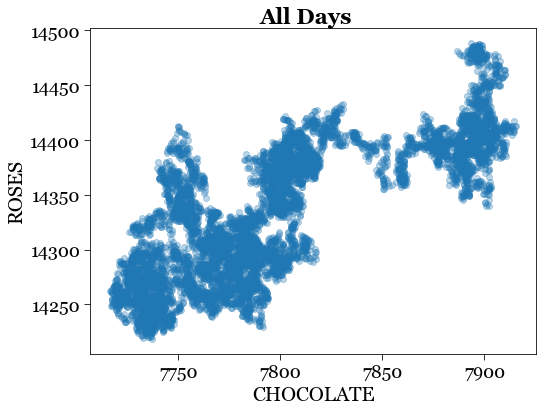

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


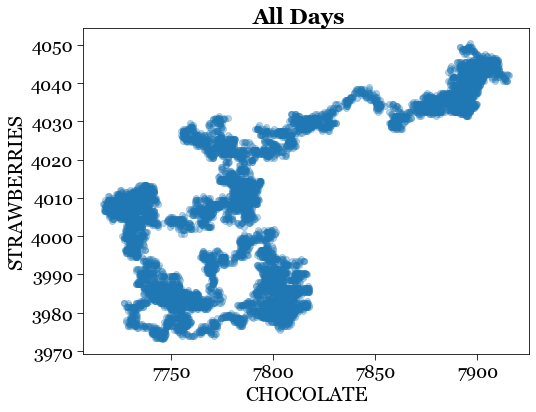

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


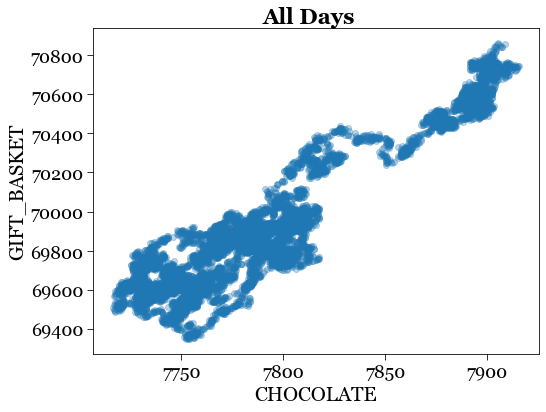

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


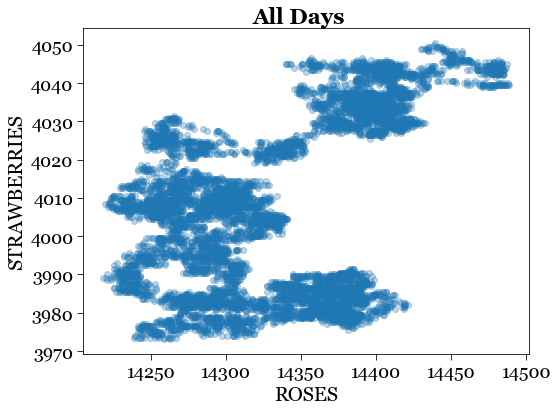

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


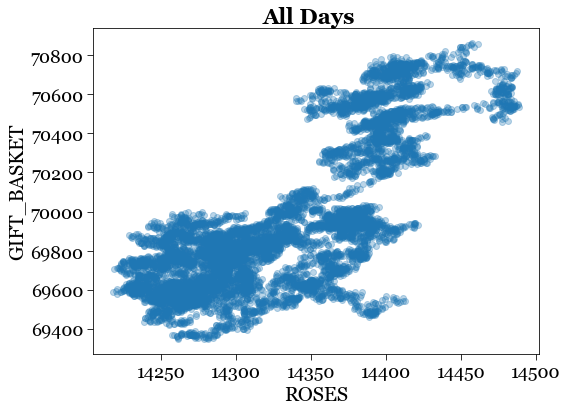

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3505268995.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


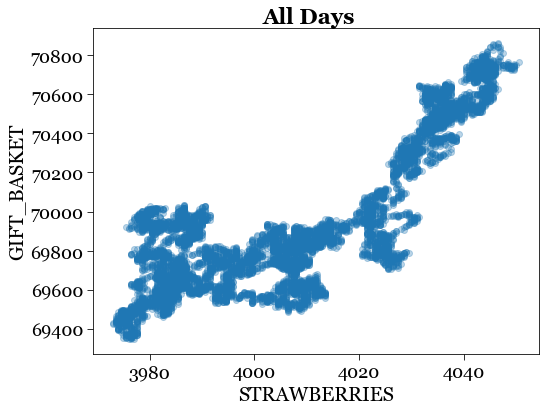

In [13]:
# Correlation scatter plot, all days at once
for i, pi in enumerate(products):
    for j, pj in enumerate(products):
        if i < j:
            fig = plt.figure(figsize=(8, 6))
            ax = plt.gca()
            filtered_pi = price[(price['product'] == pi) &
                                (price['day'] == day)]
            filtered_pj = price[(price['product'] == pj) &
                                (price['day'] == day)]
            ax.scatter(filtered_pi['mid_price'], filtered_pj['mid_price'], alpha=0.3,
                        color=tableau_colors[0], marker='o')
            
            ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
            # ax.set_xlim(0, 2000)
            # ax.set_ylim(0, 12000)
            ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
            ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
            ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
            ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

            # Customize the plot (optional)
            plt.xlabel(pi, fontdict=font)
            plt.ylabel(pj, fontdict=font)
            plt.gcf().set_facecolor('white')
            fig.suptitle(f'All Days', fontproperties=suptitle_font, y=0.93)
            # plt.legend(loc='upper left', prop=legend_font)

            # plt.savefig(f'./../plots/R3_{product}_scatter_{pi}_{pj}.png')
            # plt.savefig(f'./../plots/R3_{product}_scatter_{pi}_{pj}.pdf')
            plt.show()

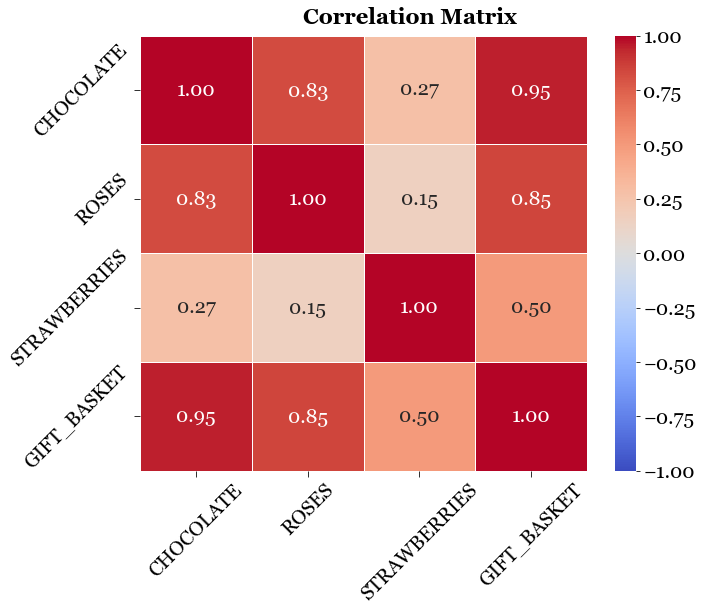

In [20]:
df_prices = pd.DataFrame()
for product in products:
    df_prices[product] = price[price['product'] == product]['mid_price'].reset_index(drop=True)

# Calculate the correlation matrix
correlation_matrix = df_prices.corr()

# Plot heatmap
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot heatmap with colorbar and customized font
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                      fmt=".2f", linewidths=0.5, 
                      vmin=-1, vmax=1, cbar=True,
                      cbar_kws={"orientation": "vertical"},
                      annot_kws={"size": 20,
                                 "fontdict": font})

# Adjust label size and tick length for both x and y axes
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tick_params(axis='both', which='major', labelsize=18, length=6)

# Set font properties for tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontdict=font)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontdict=font)

# Colorbar settings
cbar = heatmap.collections[0].colorbar
cbar.set_label(cbar.ax.get_ylabel(), fontdict=font)
heatmap.figure.axes[-1].yaxis.label.set_size(font['size'])  # Set colorbar label font size
heatmap.figure.axes[-1].tick_params(labelsize=font['size'])  # Set colorbar tick font size
for label in heatmap.figure.axes[-1].get_yticklabels():
    label.set_fontname("Georgia")

plt.gcf().set_facecolor('white')
fig.suptitle(f'Correlation Matrix', fontproperties=suptitle_font, y=0.93)

# plt.savefig(f'./../plots/R3_corr_matrix.png')
# plt.savefig(f'./../plots/R3_corr_matrix.pdf')
plt.show()

In [29]:
# Pivot the DataFrame
df_pivot = price.pivot_table(index=['day', 'timestamp'], 
                             columns='product', values='mid_price')
df_pivot['BASKET'] = 4 * df_pivot['CHOCOLATE'] \
                   + 6 * df_pivot['STRAWBERRIES'] \
                   + 1 * df_pivot['ROSES']
df_pivot = df_pivot.reset_index()
df_pivot

product  day  timestamp  CHOCOLATE  GIFT_BASKET    ROSES  STRAWBERRIES  \
0          0          0     8000.0      71355.0  15000.0        4000.0   
1          0        100     8001.5      71349.5  15000.0        3999.5   
2          0        200     8001.0      71347.0  15000.5        3999.5   
3          0        300     8002.5      71350.5  15000.0        3999.5   
4          0        400     8002.0      71341.5  14997.5        3999.5   
...      ...        ...        ...          ...      ...           ...   
29995      2     999500     7750.5      69534.5  14409.5        3983.5   
29996      2     999600     7750.5      69529.5  14408.0        3983.5   
29997      2     999700     7750.5      69543.0  14411.5        3984.5   
29998      2     999800     7750.0      69542.0  14412.5        3984.5   
29999      2     999900     7750.0      69556.0  14411.5        3984.5   

product   BASKET  
0        71000.0  
1        71003.0  
2        71001.5  
3        71007.0  
4        71002.5  
...          ...  
29995    69312.5  
29996    69311.0  
29997    69320.5  
29998    69319.5  
29999    69318.5  

[30000 rows x 7 columns]

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


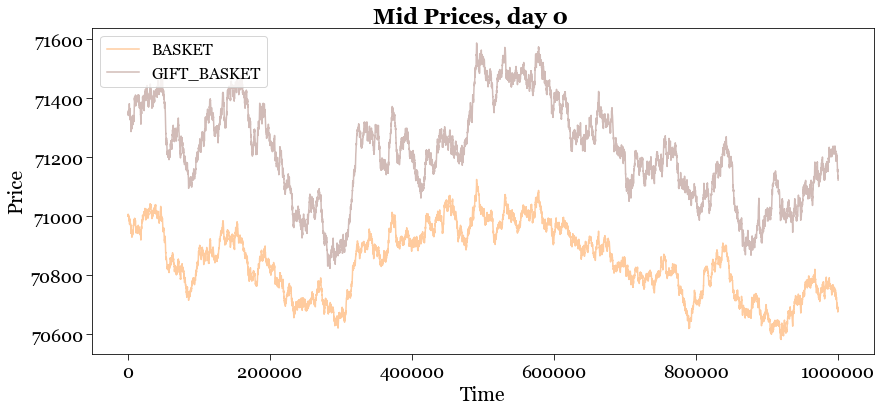

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


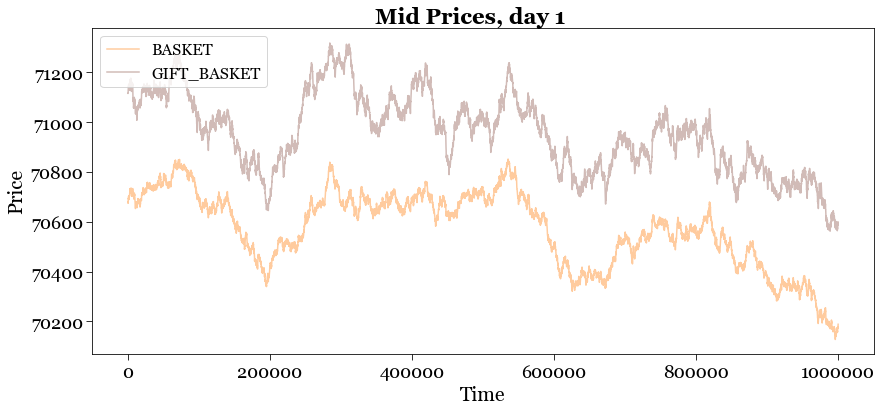

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/551532715.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


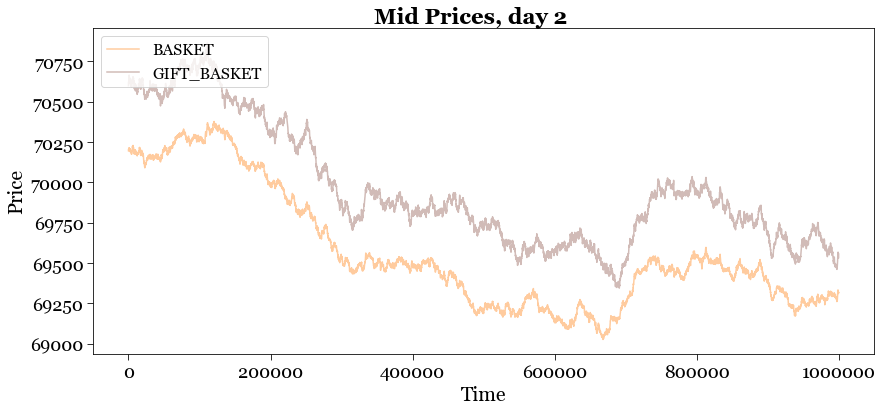

In [32]:
for day in days:
    filtered_price = df_pivot[(df_pivot['day'] == day)]

    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()
    
    xs = filtered_price['timestamp']
    y1s = filtered_price['BASKET']
    y2s = filtered_price['GIFT_BASKET']

    ax.plot(xs, y1s, label='BASKET', 
            color=tableau_colors[1], alpha=0.4)
    ax.plot(xs, y2s, label='GIFT_BASKET', 
            color=tableau_colors[5], alpha=0.4)
    
    # ax.set_xlim(0, 2000)
    # ax.set_ylim(0, 12000)

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    
    # Customize the plot (optional)
    plt.xlabel('Time', fontdict=font)
    plt.ylabel('Price', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle(f'Mid Prices, day {day}', fontproperties=suptitle_font, y=0.93)
    plt.legend(loc='upper left', prop=legend_font)
    
#     plt.savefig(f'./../plots/R3_day{day}_pair_price.png')
#     plt.savefig(f'./../plots/R3_day{day}_pair_price.pdf')
    plt.show()

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


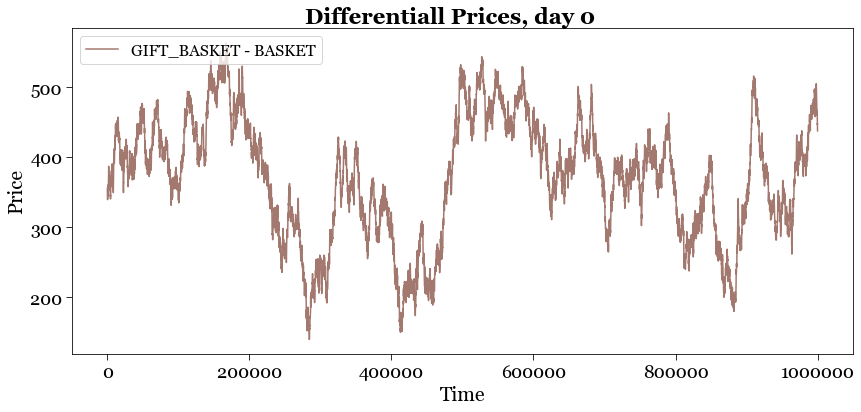

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


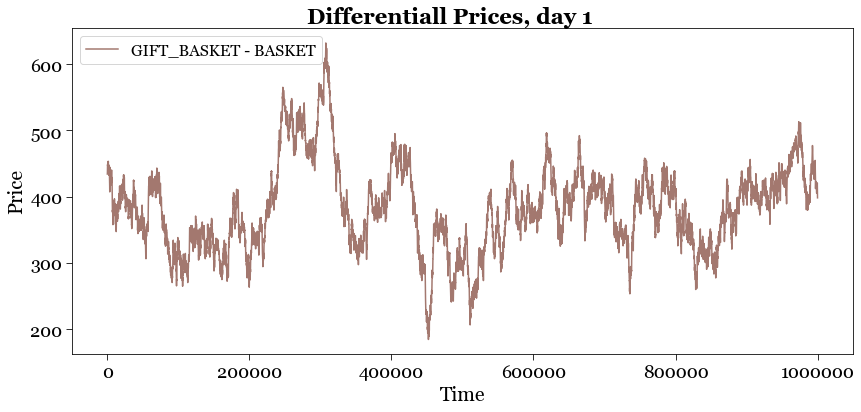

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/3795022982.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


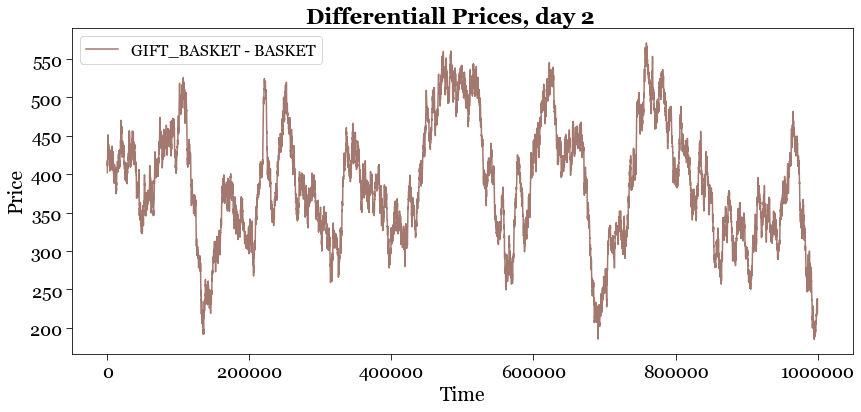

In [35]:
for day in days:
    filtered_price = df_pivot[(df_pivot['day'] == day)]

    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()
    
    xs = filtered_price['timestamp']
    y1s = filtered_price['BASKET']
    y2s = filtered_price['GIFT_BASKET']

    ax.plot(xs, y2s-y1s, label='GIFT_BASKET - BASKET', 
            color=tableau_colors[5], alpha=0.8)
    
    # ax.set_xlim(0, 2000)
    # ax.set_ylim(0, 12000)

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    
    # Customize the plot (optional)
    plt.xlabel('Time', fontdict=font)
    plt.ylabel('Price', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle(f'Differentiall Prices, day {day}', fontproperties=suptitle_font, y=0.93)
    plt.legend(loc='upper left', prop=legend_font)
    
#     plt.savefig(f'./../plots/R3_day{day}_diff_price.png')
#     plt.savefig(f'./../plots/R3_day{day}_diff_price.pdf')
    plt.show()

### Outline for Volatility Analysis
For each day and each product - 
- Calculate volatility metrics such as standard deviation, variance, or average true range (ATR) for mid-price.
- To calculate instantaneous volatility for a time series of stock prices, you can use methods such as the exponentially weighted moving average (EWMA) of historical returns or the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model. The EWMA method is simpler and more commonly used for this purpose.
- Plot volatility over time to identify periods of high and low volatility.

0.017869191630991002


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


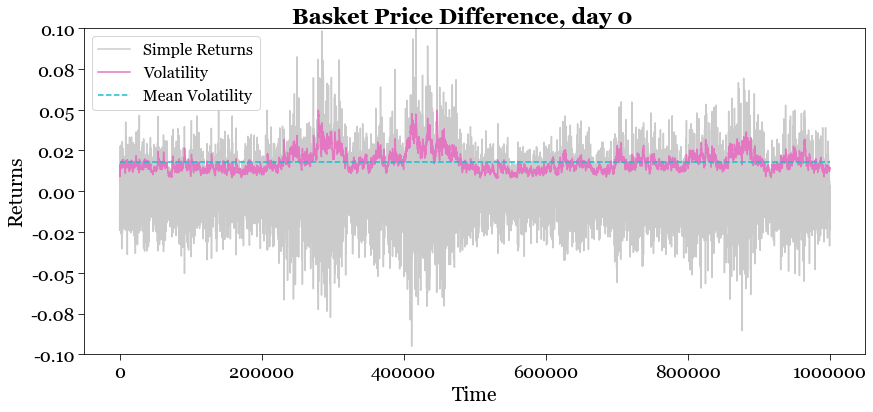

0.0165906967343853


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


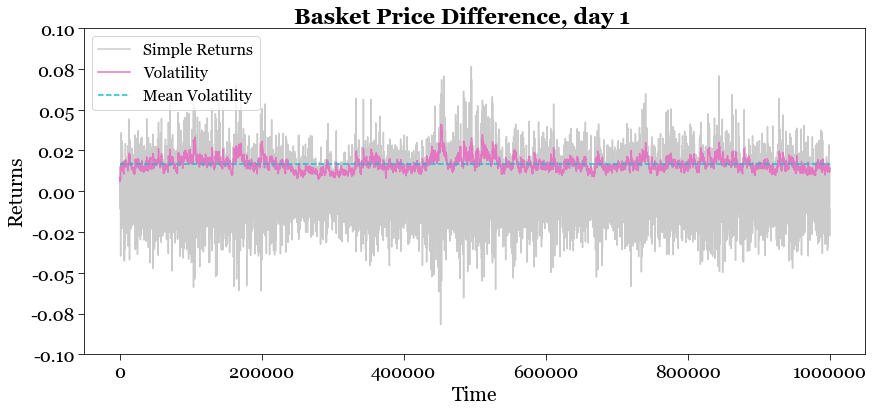

0.01681712071139382


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_3414/1441661307.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


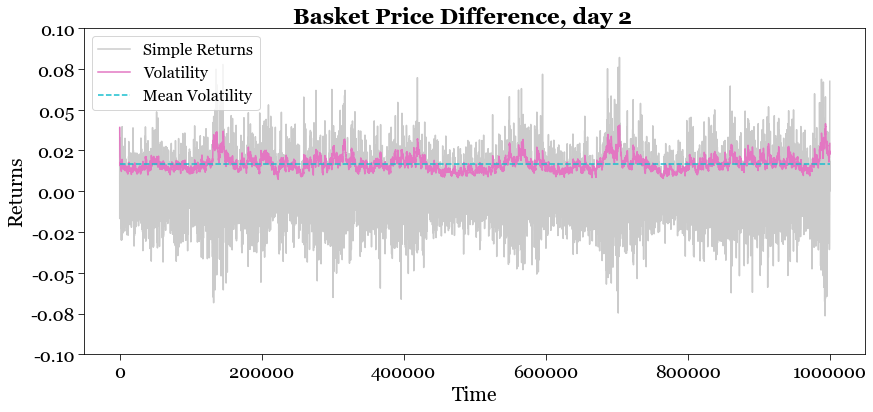

In [47]:
for day in days:
    filtered_price = df_pivot[(df_pivot['day'] == day)]

    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()
    
    xs = filtered_price['timestamp']
    y1s = filtered_price['BASKET']
    y2s = filtered_price['GIFT_BASKET']

    ydiff = y2s - y1s
    returns = ydiff.pct_change()

    # Calculate EWMA volatility
    window_size = 20  # You can adjust this value
    vols = returns.ewm(span=window_size).std()
    print(vols.mean())

    ax.plot(xs, returns, label='Simple Returns', 
            color=tableau_colors[7], alpha=0.4)
    ax.plot(xs, vols, label='Volatility', 
            color=tableau_colors[6], alpha=1)
    ax.hlines(vols.mean(), xs.min(), xs.max(), 
              color=tableau_colors[9], linestyle='--', 
              label='Mean Volatility')
    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    # ax.set_xlim(0, 2000)
    ax.set_ylim(-0.1, 0.1)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

    # Customize the plot (optional)
    plt.xlabel('Time', fontdict=font)
    plt.ylabel('Returns', fontdict=font)
    plt.gcf().set_facecolor('white')
    fig.suptitle(f'Basket Price Difference, day {day}', fontproperties=suptitle_font, y=0.93)
    plt.legend(loc='upper left', prop=legend_font)

#     plt.savefig(f'./../plots/R3_pair_diff_day{day}_vol.png')
#     plt.savefig(f'./../plots/R3_pair_diff_day{day}_vol.pdf')
    plt.show()

### Outline for Autocorrelation Analysis:
For each product -
- Calculate autocorrelation functions (ACF) and partial autocorrelation functions (PACF) to identify any serial correlation in the time series data.
- Plot ACF and PACF to visualize autocorrelation patterns.

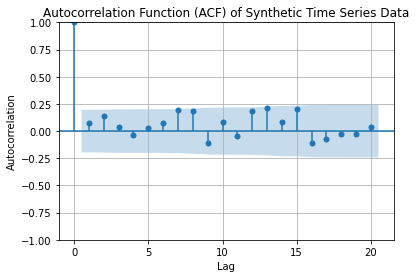

In [56]:
# Generate synthetic time series data
np.random.seed(0)
n = 100  # Number of data points
mean = 0  # Mean of the Gaussian noise
std_dev = 1  # Standard deviation of the Gaussian noise
ts_data = np.random.normal(mean, std_dev, n)

# Plot Autocorrelation Function (ACF)
plot_acf(ts_data, lags=20)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) of Synthetic Time Series Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [57]:
ts_data

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [61]:
test = ydiff


20000    402.0
20001    417.5
20002    410.5
20003    412.0
20004    425.5
         ...  
29995    222.0
29996    218.5
29997    222.5
29998    222.5
29999    237.5
Length: 10000, dtype: float64

In [60]:
df_pivot[(df_pivot['day'] == 0)]['timestamp']

0            0
1          100
2          200
3          300
4          400
         ...  
9995    999500
9996    999600
9997    999700
9998    999800
9999    999900
Name: timestamp, Length: 10000, dtype: int64

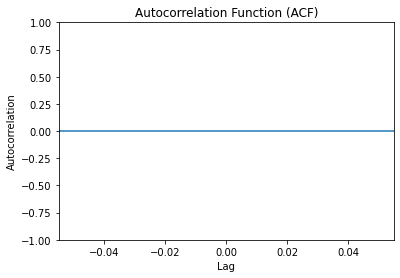

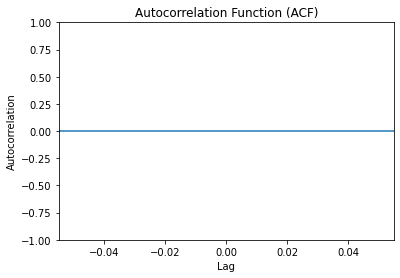

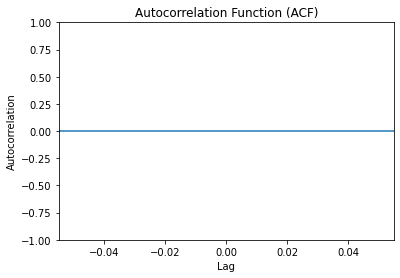

In [55]:
for day in days:
    filtered_price = df_pivot[(df_pivot['day'] == day)]

    # fig = plt.figure(figsize=(14, 6))
    # ax = plt.gca()
    
    xs = filtered_price['timestamp']
    y1s = filtered_price['BASKET']
    y2s = filtered_price['GIFT_BASKET']
    
    ydiff = y2s - y1s
    returns = ydiff.pct_change()

    # Plot Autocorrelation Function (ACF)
    plot_acf(returns, lags=10)

    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()


    # ax.plot(xs, returns, label='Simple Returns', 
    #         color=tableau_colors[7], alpha=0.4)

    # Customize tick sizes
#     ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
#     # ax.set_xlim(0, 2000)
#     ax.set_ylim(-0.1, 0.1)
#     ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
#     ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
#     ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
#     ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

#     # Customize the plot (optional)
#     plt.xlabel('Lag', fontdict=font)
#     plt.ylabel('Autocorrelation', fontdict=font)
#     plt.gcf().set_facecolor('white')
#     fig.suptitle(f'Autocorrelation Function (ACF), day {day}', fontproperties=suptitle_font, y=0.93)
#     plt.legend(loc='upper left', prop=legend_font)

# #     plt.savefig(f'./../plots/R3_pair_diff_day{day}_vol.png')
# #     plt.savefig(f'./../plots/R3_pair_diff_day{day}_vol.pdf')
#     plt.show()